# EDA on Bitcoin and Ethereum

## Import libraries

In [1]:
#Load the required libraries
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

## Importing data

In [2]:
# list of files
path = r'C:\\Users\\victor.komou\\Downloads\\Omdina Crypto projet\\Final_Data\\'
files = os.listdir(path)
files

['BTCUSD_1h.csv', 'ETHUSD_1h.csv']

In [3]:
# list of crptocurrencies as ticker arguments
crypto = []
for f in files:
    name = f.split('_')[0]
    crypto.append(name[:len(name)-3])
crypto

['BTC', 'ETH']

In [4]:
# Importing data 
data_BTC = pd.read_csv(os.path.join(path, files[0]))
data_ETH = pd.read_csv(os.path.join(path, files[1]))

## Explore the Dataset

In [5]:
data_BTC.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


In [6]:
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open_time               32821 non-null  object 
 1   open                    32821 non-null  float64
 2   high                    32821 non-null  float64
 3   low                     32821 non-null  float64
 4   close                   32821 non-null  float64
 5   volume                  32821 non-null  float64
 6   close_time              32821 non-null  object 
 7   quote_volume            32821 non-null  float64
 8   count                   32821 non-null  int64  
 9   taker_buy_volume        32821 non-null  float64
 10  taker_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
data_ETH.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


In [8]:
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open_time               32821 non-null  object 
 1   open                    32821 non-null  float64
 2   high                    32821 non-null  float64
 3   low                     32821 non-null  float64
 4   close                   32821 non-null  float64
 5   volume                  32821 non-null  float64
 6   close_time              32821 non-null  object 
 7   quote_volume            32821 non-null  float64
 8   count                   32821 non-null  int64  
 9   taker_buy_volume        32821 non-null  float64
 10  taker_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.8+ MB


From the output, we can see that for each dataset we have 44491 rows and 9 columns.\
The mains columns are:
- **open_time**: This represents the opening time of a specific period in Unix time format. Unix time is a way to represent time as the number of seconds that have elapsed since January 1, 1970.
- **open**: This refers to the opening price of the trading instrument at the given period.
- **high**: This represents the highest price reached by the trading instrument during the specified period.
- **low**: This denotes the lowest price reached by the trading instrument during the specified period.
- **close**: This indicates the closing price of the trading instrument at the given period.
- **Volume**: This refers to the total volume, typically the quantity of the trading instrument, traded during the specified period.
- **close_time**: This represents the closing time of the specific period in Unix time format.
- **quote_volume**: This refers to the total volume in terms of the quote asset. The quote asset is the asset used to determine the value of the trading instrument.
- **count**: This represents the number of trades that occurred during the specified period.
- **taker_buy_volume**: This denotes the volume of the quote asset bought by takers (market takers) during the specified period.
- **taker_buy_quote_volume**: This represents the volume of the base asset bought by takers (market takers) during the specified period.

## Data Cleaning

### Missing values

In [9]:
data_BTC.isnull().sum()

open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_volume              0
count                     0
taker_buy_volume          0
taker_buy_quote_volume    0
dtype: int64

In [10]:
data_ETH.isnull().sum()

open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_volume              0
count                     0
taker_buy_volume          0
taker_buy_quote_volume    0
dtype: int64

No missing values in both datasets.

### Convert the date column to datetime format

In [11]:
data_BTC['open_time'] = pd.to_datetime(data_BTC['open_time'])
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   open_time               32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   volume                  32821 non-null  float64       
 6   close_time              32821 non-null  object        
 7   quote_volume            32821 non-null  float64       
 8   count                   32821 non-null  int64         
 9   taker_buy_volume        32821 non-null  float64       
 10  taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 2.8+ MB


In [12]:
data_ETH['open_time'] = pd.to_datetime(data_ETH['open_time'])
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   open_time               32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   volume                  32821 non-null  float64       
 6   close_time              32821 non-null  object        
 7   quote_volume            32821 non-null  float64       
 8   count                   32821 non-null  int64         
 9   taker_buy_volume        32821 non-null  float64       
 10  taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 2.8+ MB


### Sorting in ascending Date Order

In [13]:
data_BTC = data_BTC.sort_values(by = "open_time", ascending = True, ignore_index=True)
data_BTC.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


In [14]:
data_ETH = data_ETH.sort_values(by = "open_time", ascending = True, ignore_index=True)
data_ETH.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


### Ckeck for duplicates

In [15]:
data_BTC.duplicated().sum()

0

In [16]:
data_ETH.duplicated().sum()

0

No duplicates rows in both datasets.

### Rename columns

In [17]:
data_BTC.rename(columns={'open_time': 'date'}, inplace=True)
data_BTC.head()

,date,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


In [18]:
data_ETH.rename(columns={'open_time': 'date'}, inplace=True)
data_ETH.head()

,date,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


### Remove irrelevant columns

We will focus on the Close column, but we keep all OHLC (open, high, low, close) for Candlestick visualization

In [19]:
data_BTC.drop(['close_time'], axis=1, inplace=True)
data_BTC.head()

,date,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,5.216076e+06,5536,368.470786,3.544535e+06


In [20]:
data_ETH.drop(['close_time'], axis=1, inplace=True)
data_ETH.head()

,date,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,4.476401e+05,2848,1524.31952,262782.612091


### Handle outliers

In [21]:
q1 = data_BTC['close'].quantile(0.25)
q3 = data_BTC['close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = data_BTC[data_BTC['close'] <= upper_bound]
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   volume                  32821 non-null  float64       
 6   quote_volume            32821 non-null  float64       
 7   count                   32821 non-null  int64         
 8   taker_buy_volume        32821 non-null  float64       
 9   taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


In [22]:
q1 = data_ETH['close'].quantile(0.25)
q3 = data_ETH['close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = data_ETH[data_ETH['close'] <= upper_bound]
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   volume                  32821 non-null  float64       
 6   quote_volume            32821 non-null  float64       
 7   count                   32821 non-null  int64         
 8   taker_buy_volume        32821 non-null  float64       
 9   taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


No outliers were found in either dataset.

### standardize data

In [ ]:
#scaler = StandardScaler()
#data_BTC[['open', 'high', 'low', 'close']] = scaler.fit_transform(data_BTC[['open', 'high', 'low', 'close']])
#data_ETH[['open', 'high', 'low', 'close']] = scaler.fit_transform(data_ETH[['open', 'high', 'low', 'close']])

## Data Visualization

### Trend Visualization

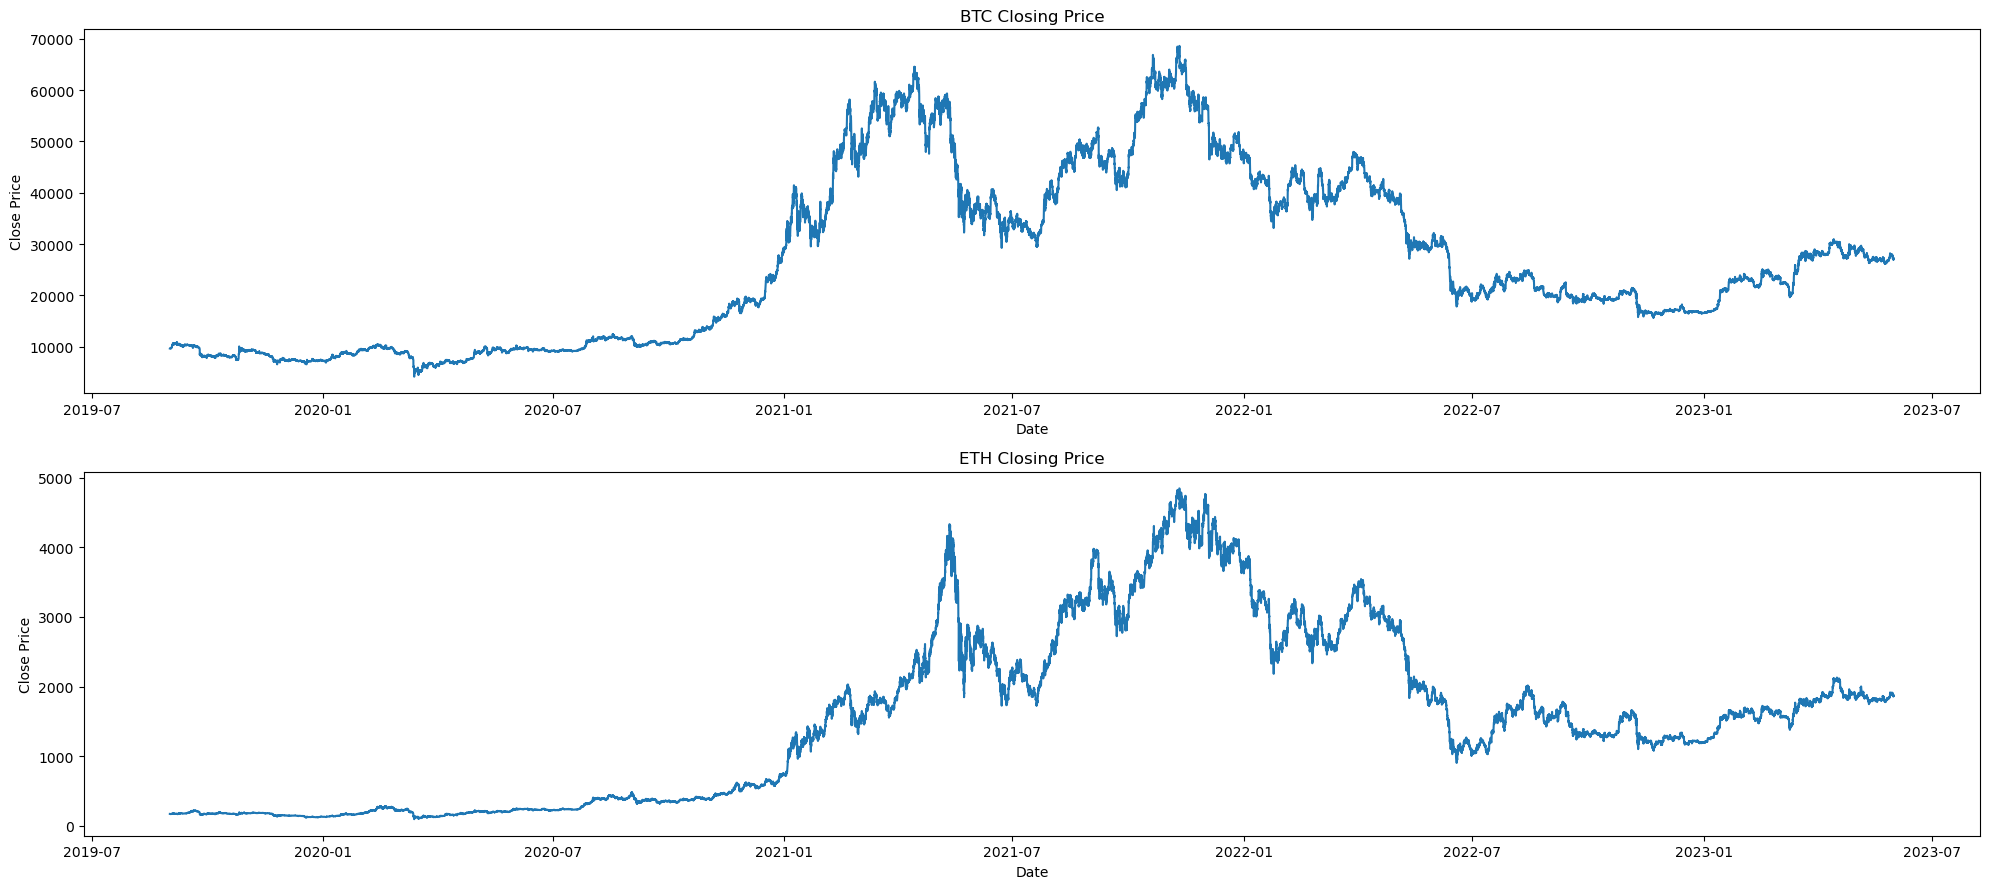

In [23]:
# ploting the closing price
plt.figure(figsize=(20, 9))

# Plotting Bitcoin price
plt.subplot(2, 1, 1)
plt.plot(data_BTC["date"], data_BTC["close"])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("BTC Closing Price")

# Plotting Ethereum price
plt.subplot(2, 1, 2)
plt.plot(data_ETH["date"], data_ETH["close"])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("ETH Closing Price")

plt.tight_layout()
plt.show()

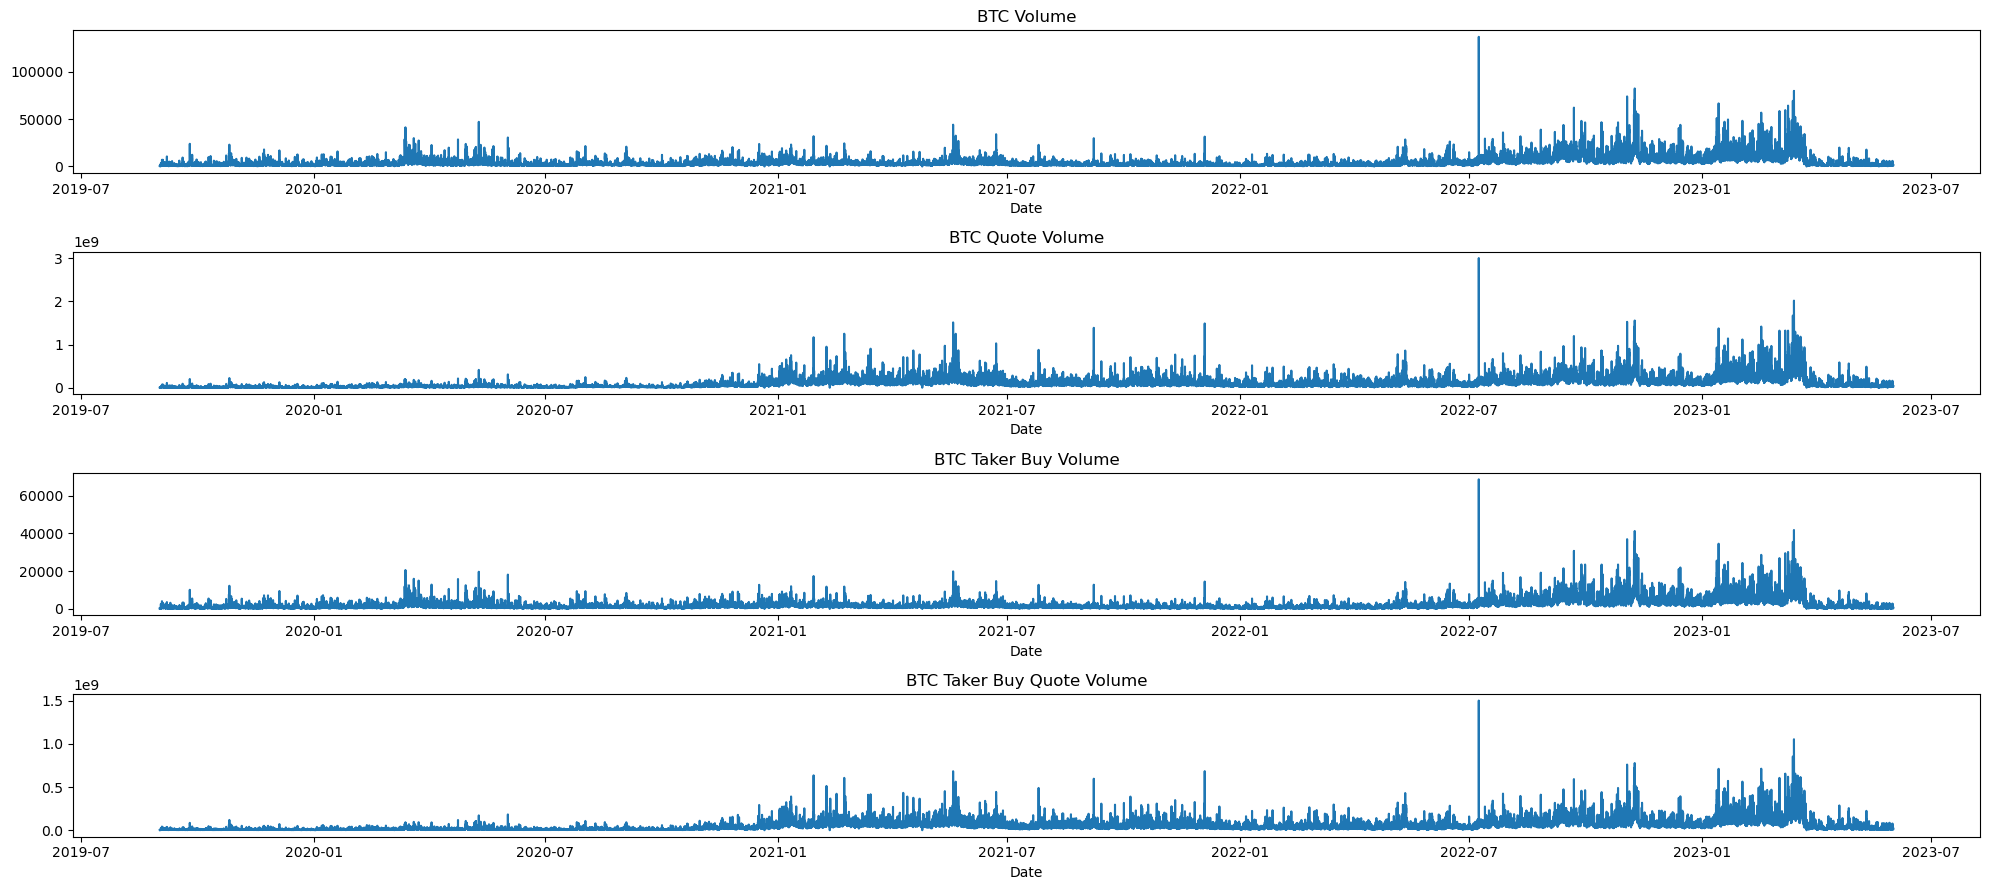

In [24]:
# ploting BTC Volumes
plt.figure(figsize=(20, 9))

# Plotting volume
plt.subplot(4, 1, 1)
plt.plot(data_BTC["date"], data_BTC["volume"])
plt.xlabel('Date')
plt.title("BTC Volume")

# Plotting quote_volume
plt.subplot(4, 1, 2)
plt.plot(data_BTC["date"], data_BTC["quote_volume"])
plt.xlabel('Date')
plt.title("BTC Quote Volume")

# Plotting taker_buy_volume
plt.subplot(4, 1, 3)
plt.plot(data_BTC["date"], data_BTC["taker_buy_volume"])
plt.xlabel('Date')
plt.title("BTC Taker Buy Volume")

# Plotting taker_buy_quote_volume
plt.subplot(4, 1, 4)
plt.plot(data_BTC["date"], data_BTC["taker_buy_quote_volume"])
plt.xlabel('Date')
plt.title("BTC Taker Buy Quote Volume")

plt.tight_layout()
plt.show()

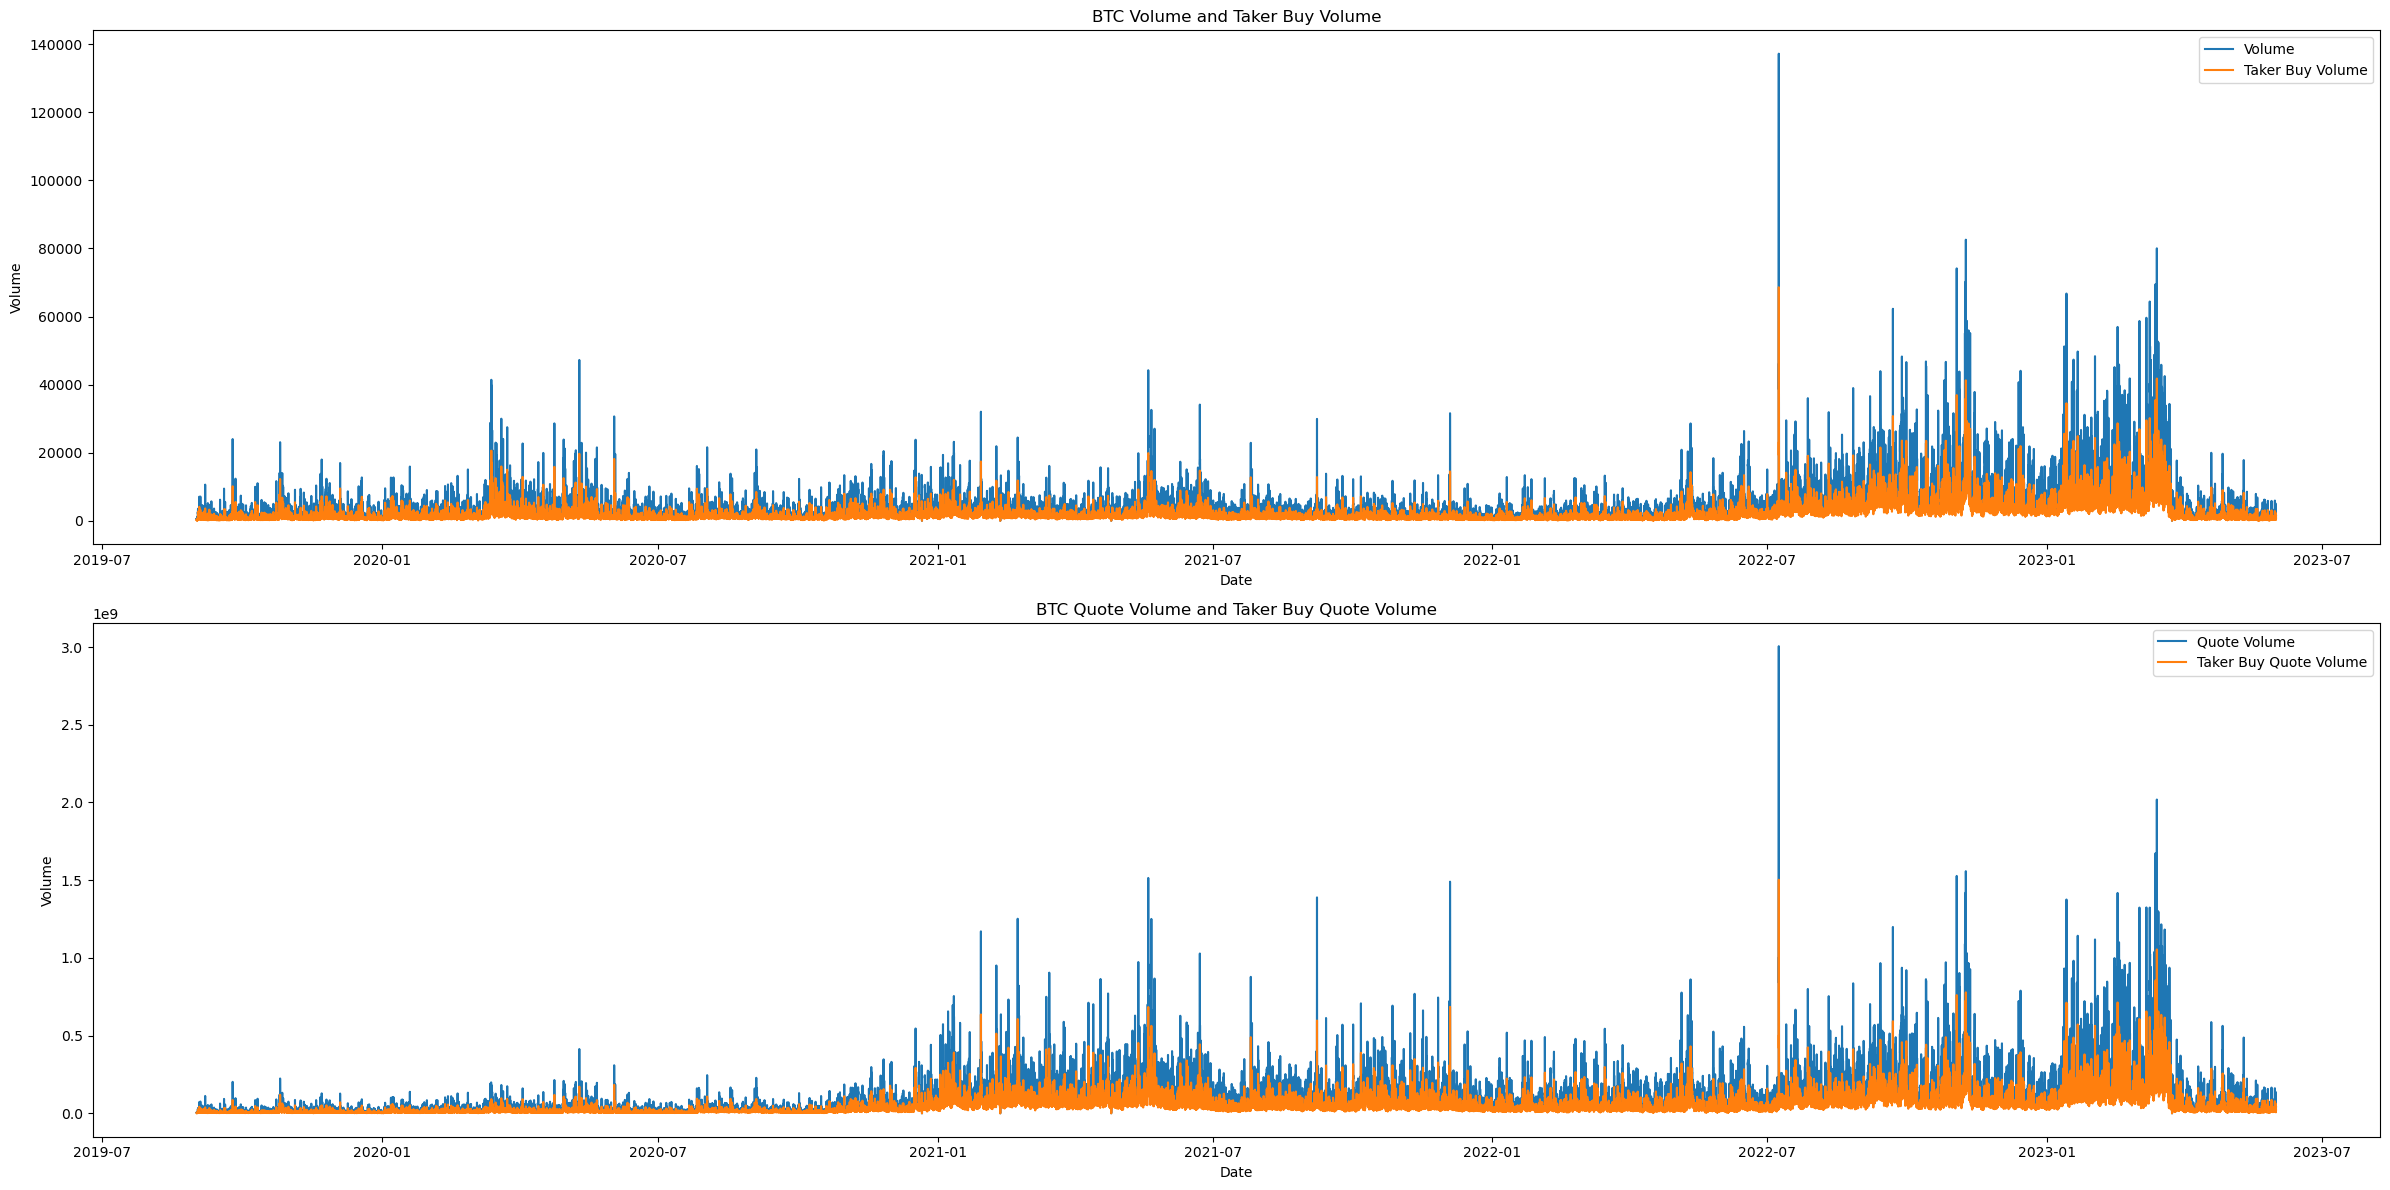

In [25]:
# ploting BTC volumes
plt.figure(figsize=(24, 12))

# Plotting Volume and Taker Buy Volume
plt.subplot(2, 1, 1)
plt.plot(data_BTC["date"], data_BTC["volume"], label="Volume")
plt.plot(data_BTC["date"], data_BTC["taker_buy_volume"], label="Taker Buy Volume")
plt.title("BTC Volume and Taker Buy Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

# Plotting Quote Volume and Taker Buy Quote Volume
plt.subplot(2, 1, 2)
plt.plot(data_BTC["date"], data_BTC["quote_volume"], label="Quote Volume")
plt.plot(data_BTC["date"], data_BTC["taker_buy_quote_volume"], label="Taker Buy Quote Volume")
plt.title("BTC Quote Volume and Taker Buy Quote Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

plt.tight_layout()
plt.show()

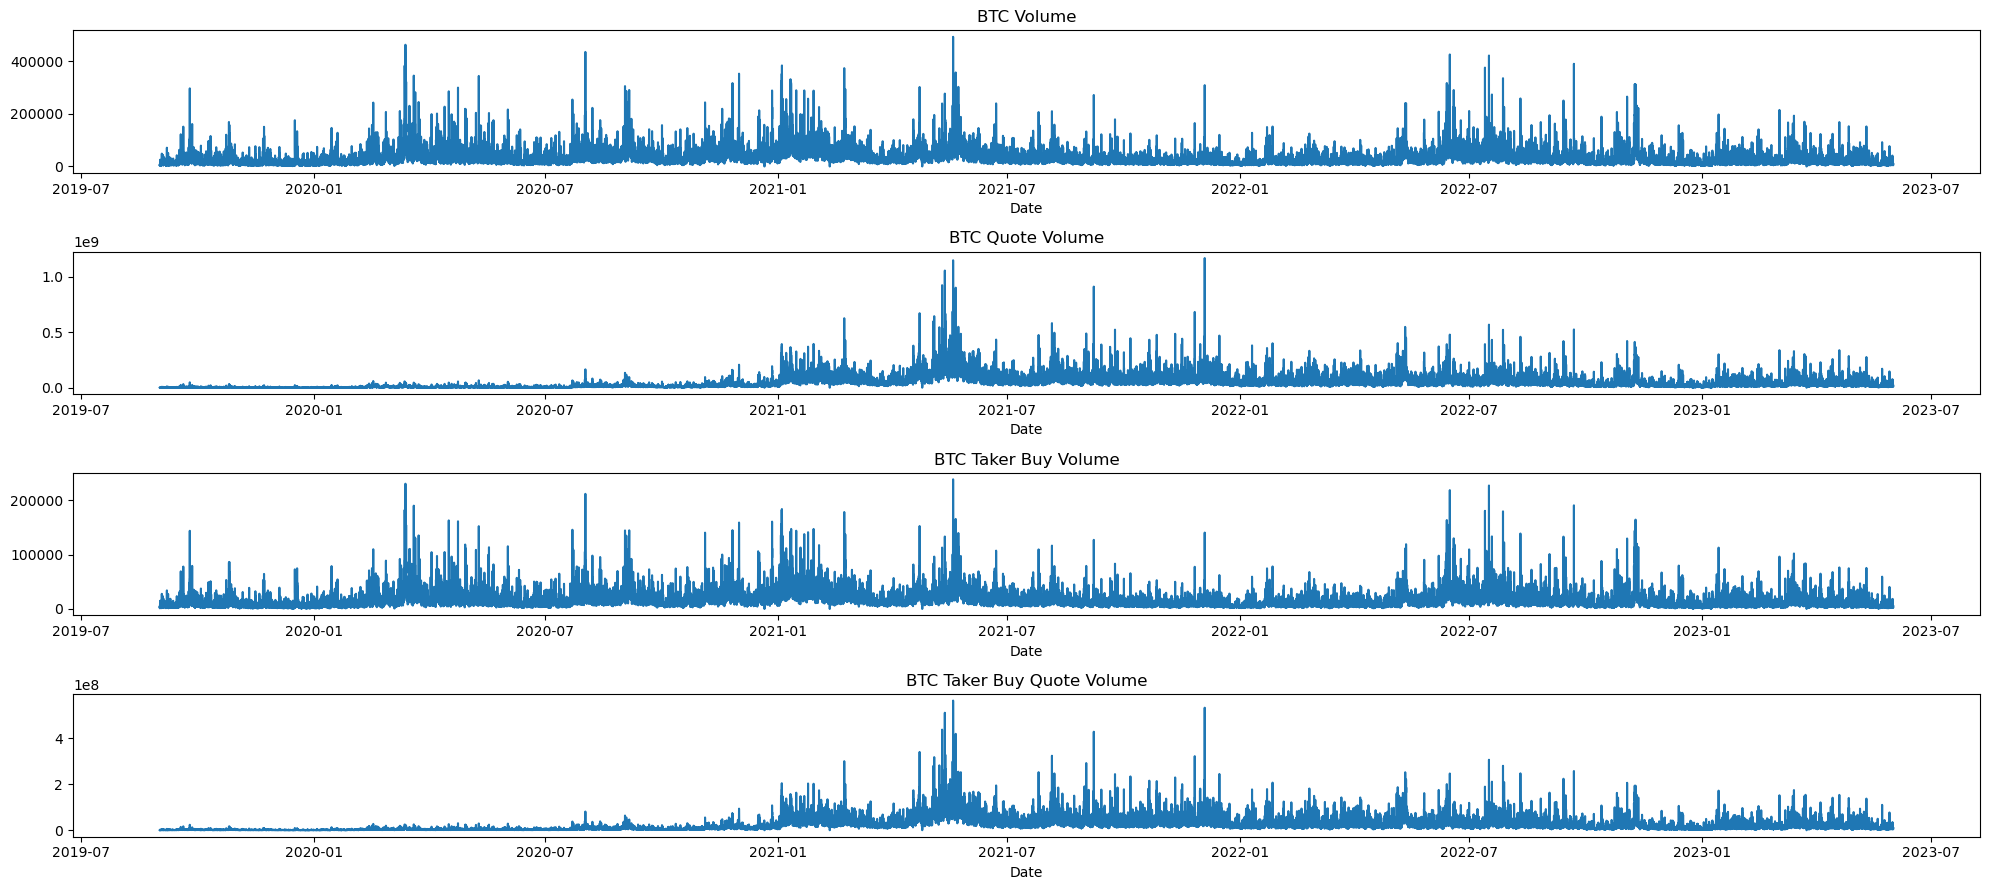

In [26]:
# ploting ETH Volumes
plt.figure(figsize=(20, 9))

# Plotting volume
plt.subplot(4, 1, 1)
plt.plot(data_ETH["date"], data_ETH["volume"])
plt.xlabel('Date')
plt.title("BTC Volume")

# Plotting quote_volume
plt.subplot(4, 1, 2)
plt.plot(data_ETH["date"], data_ETH["quote_volume"])
plt.xlabel('Date')
plt.title("BTC Quote Volume")

# Plotting taker_buy_volume
plt.subplot(4, 1, 3)
plt.plot(data_ETH["date"], data_ETH["taker_buy_volume"])
plt.xlabel('Date')
plt.title("BTC Taker Buy Volume")

# Plotting taker_buy_quote_volume
plt.subplot(4, 1, 4)
plt.plot(data_ETH["date"], data_ETH["taker_buy_quote_volume"])
plt.xlabel('Date')
plt.title("BTC Taker Buy Quote Volume")

plt.tight_layout()
plt.show()

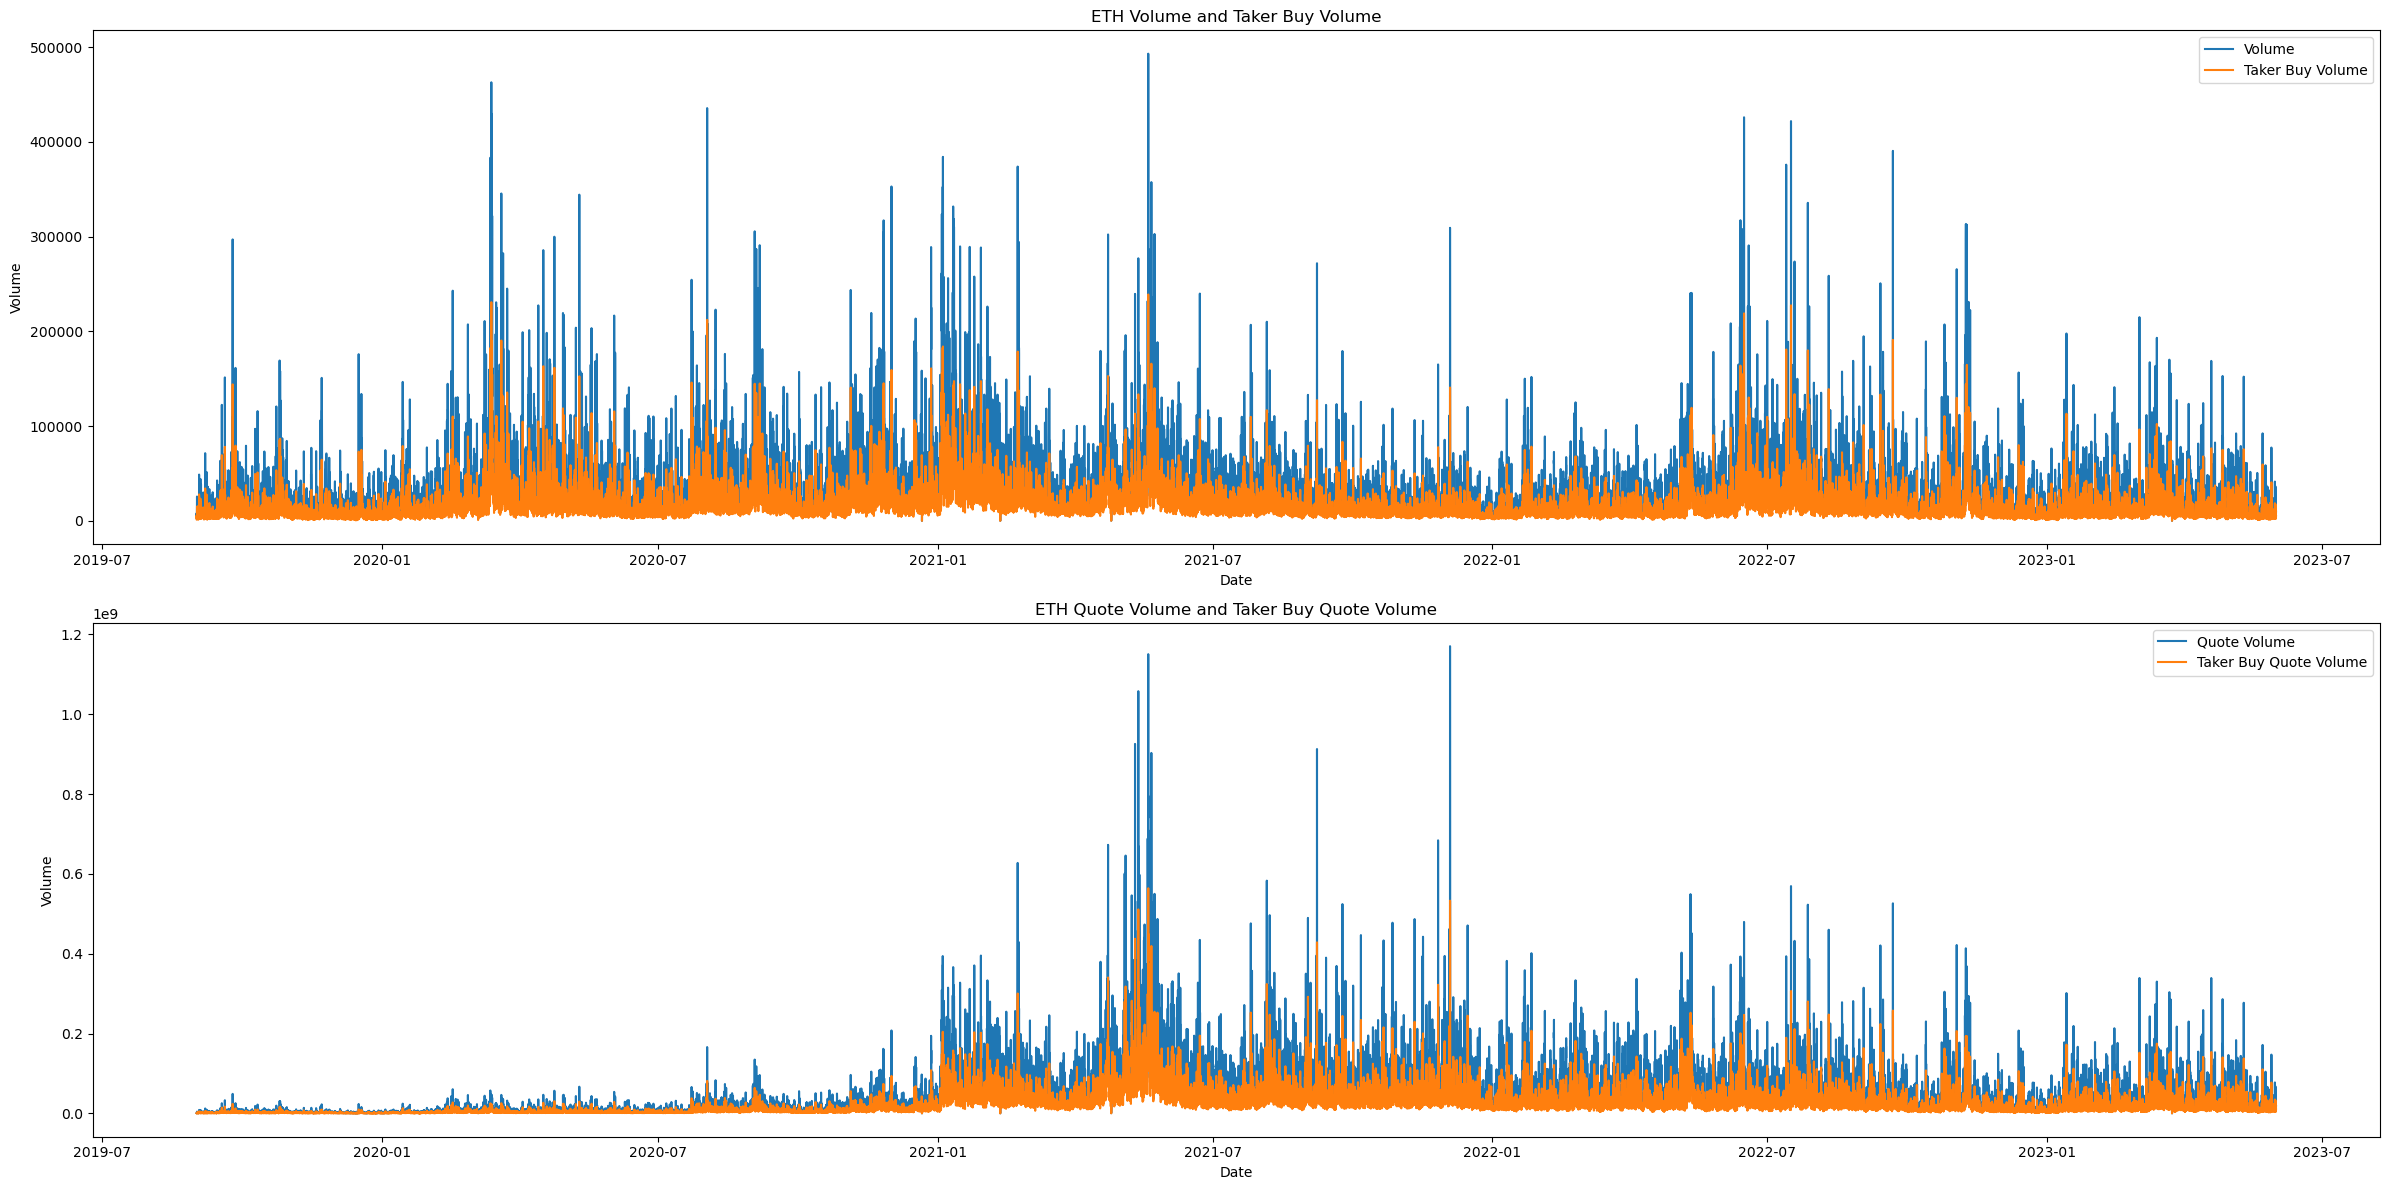

In [27]:
# ploting ETH volumes
plt.figure(figsize=(24, 12))

# Plotting Bitcoin price
plt.subplot(2, 1, 1)
plt.plot(data_ETH["date"], data_ETH["volume"], label="Volume")
plt.plot(data_ETH["date"], data_ETH["taker_buy_volume"], label="Taker Buy Volume")
plt.title("ETH Volume and Taker Buy Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

# Plotting Bitcoin price
plt.subplot(2, 1, 2)
plt.plot(data_ETH["date"], data_ETH["quote_volume"], label="Quote Volume")
plt.plot(data_ETH["date"], data_ETH["taker_buy_quote_volume"], label="Taker Buy Quote Volume")
plt.title("ETH Quote Volume and Taker Buy Quote Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

plt.tight_layout()
plt.show()

### Candle stick charts

In [ ]:
fig = go.Figure(data=
    [go.Candlestick(x = data_BTC["date"],
                    open  = data_BTC["open"],
                    high  = data_BTC["high"],
                    low   = data_BTC["low"],
                    close = data_BTC["close"])]
)
fig.update_layout(
    title='BTC Price',
    yaxis_title="Price ($)"
)
fig.show()


In [ ]:
fig = go.Figure(data=
    [go.Candlestick(x = data_ETH["date"],
                    open  = data_ETH["open"],
                    high  = data_ETH["high"],
                    low   = data_ETH["low"],
                    close = data_ETH["close"])]
)
fig.update_layout(
    title='ETH Price',
    yaxis_title="Price ($)"
)
fig.show()

### Distribution Visualization

In [28]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


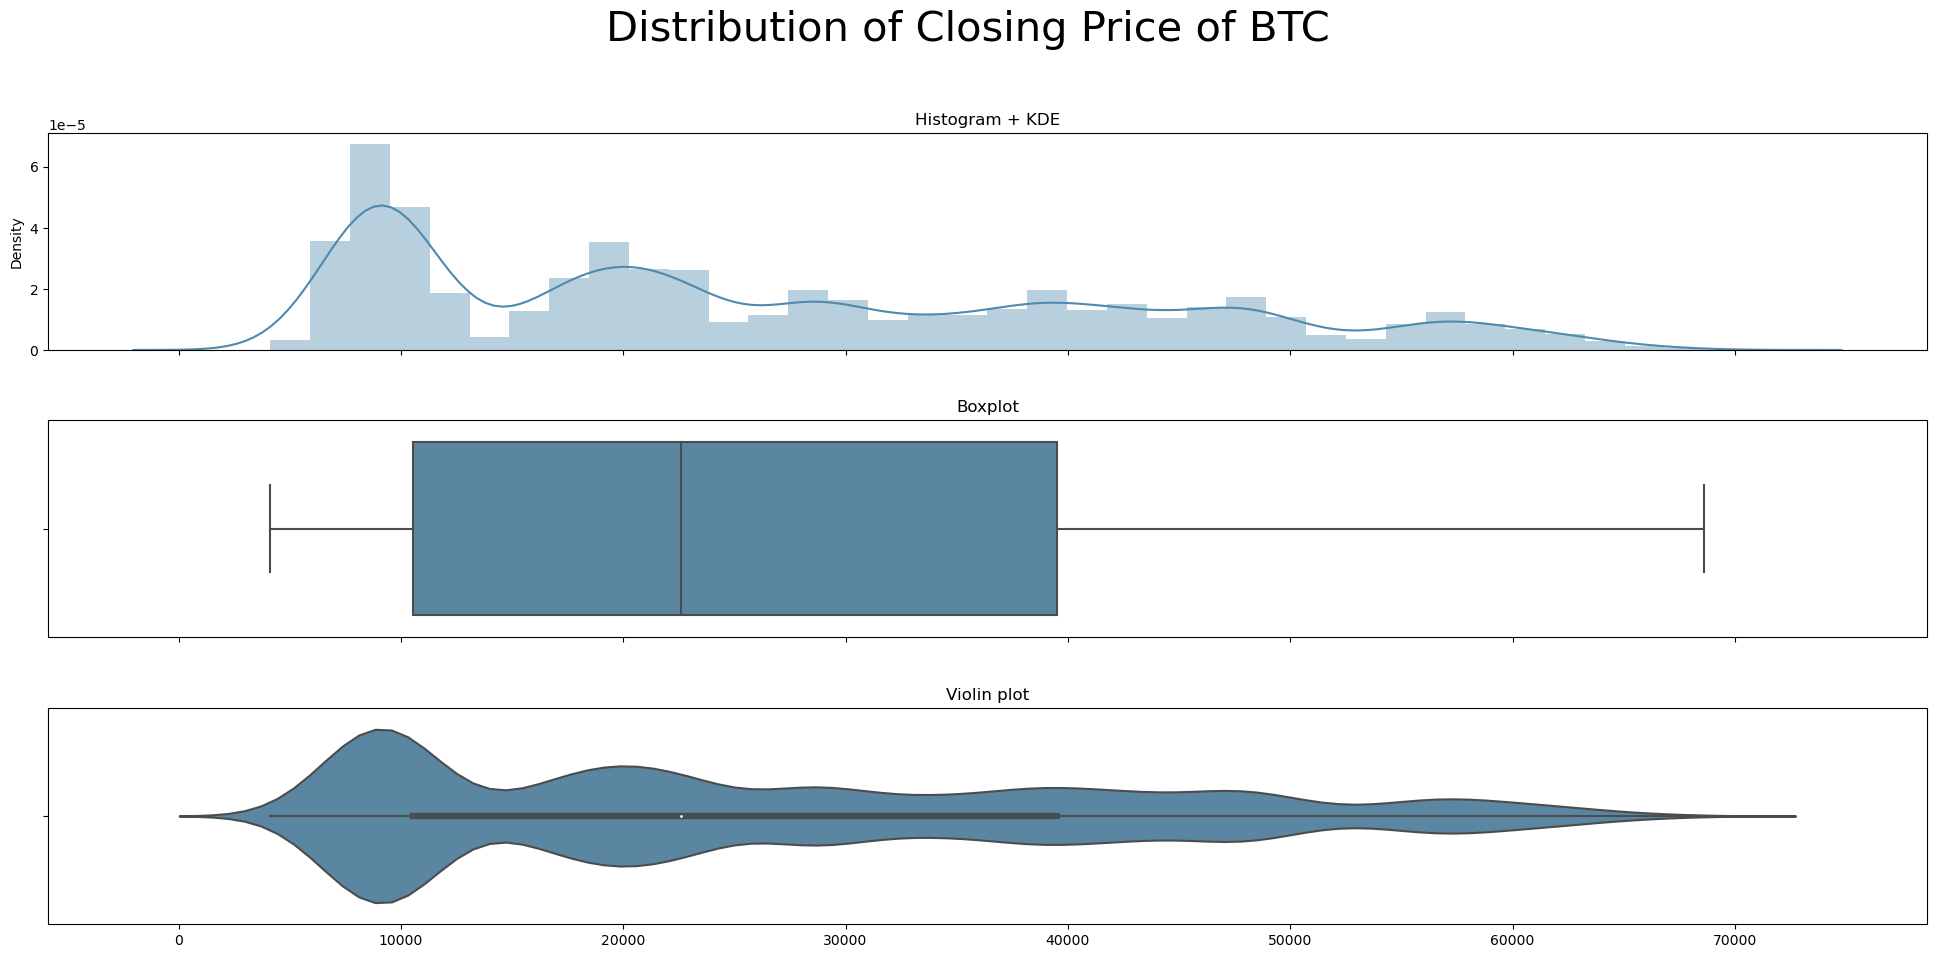

In [29]:
triple_plot(data_BTC['close'], 'Distribution of Closing Price of BTC', custom_colors[0])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


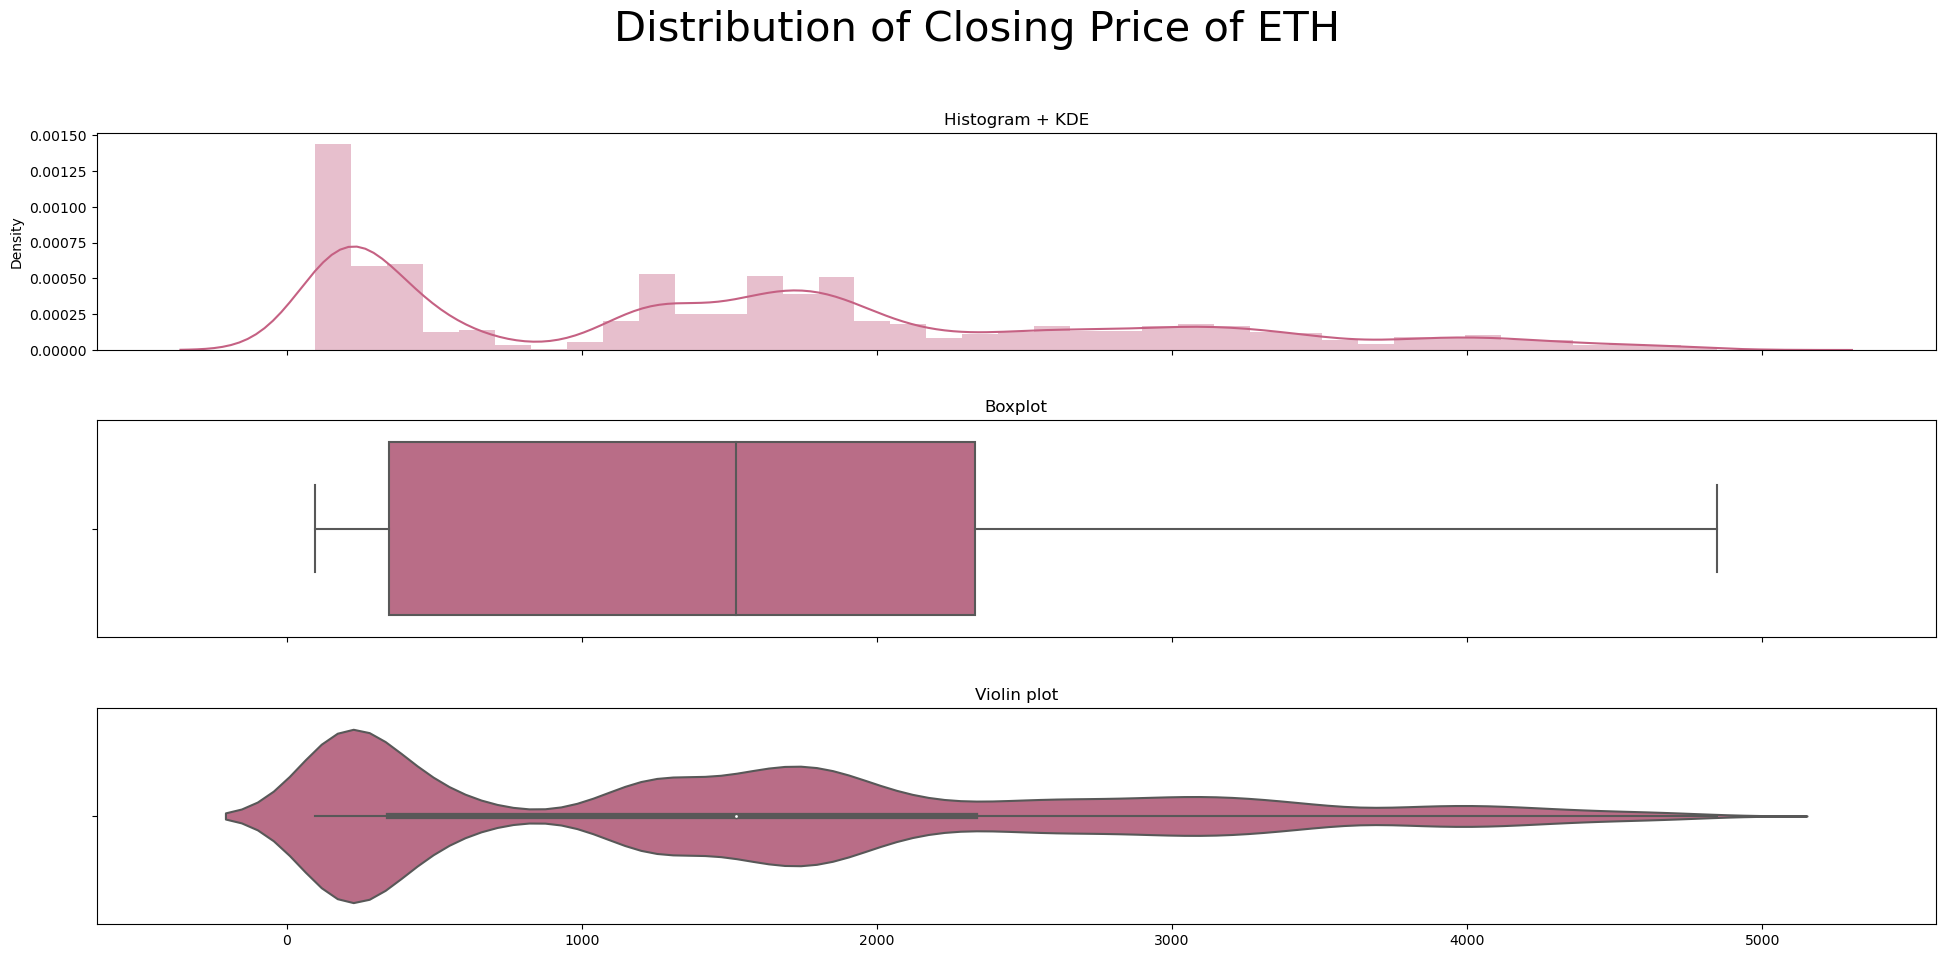

In [30]:
triple_plot(data_ETH['close'], 'Distribution of Closing Price of ETH', custom_colors[1])

### Return Series

A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time.

A return is a change in the price of an asset over time.

Returns can be positive, representing a profit, or negative, indicating a loss. Return series of an asset are easier to handle than price series and give a complete summary of the investment opportunity.

We will use the pandas **`pct_change()`** function to compute the returns.

These are relative price changes of the cryptocurrencies

In [31]:
returns_BTC = data_BTC[['date', 'close']]
returns_BTC['return'] = returns_BTC['close'].pct_change()
returns_BTC.head()

C:\Users\victor.komou\AppData\Local\Temp\ipykernel_22812\400451549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_BTC['return'] = returns_BTC['close'].pct_change()


,date,close,return
0,2019-09-01 00:00:00,9617.06,NaN
1,2019-09-01 01:00:00,9614.99,-0.000215
2,2019-09-01 02:00:00,9605.78,-0.000958
3,2019-09-01 03:00:00,9623.02,0.001795
4,2019-09-01 04:00:00,9614.46,-0.000890


In [32]:
returns_ETH = data_ETH[['date', 'close']]
returns_ETH['return'] = returns_ETH['close'].pct_change()
returns_ETH.head()

C:\Users\victor.komou\AppData\Local\Temp\ipykernel_22812\725086979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_ETH['return'] = returns_ETH['close'].pct_change()


,date,close,return
0,2019-09-01 00:00:00,172.45,NaN
1,2019-09-01 01:00:00,172.71,0.001508
2,2019-09-01 02:00:00,172.43,-0.001621
3,2019-09-01 03:00:00,172.57,0.000812
4,2019-09-01 04:00:00,172.46,-0.000637


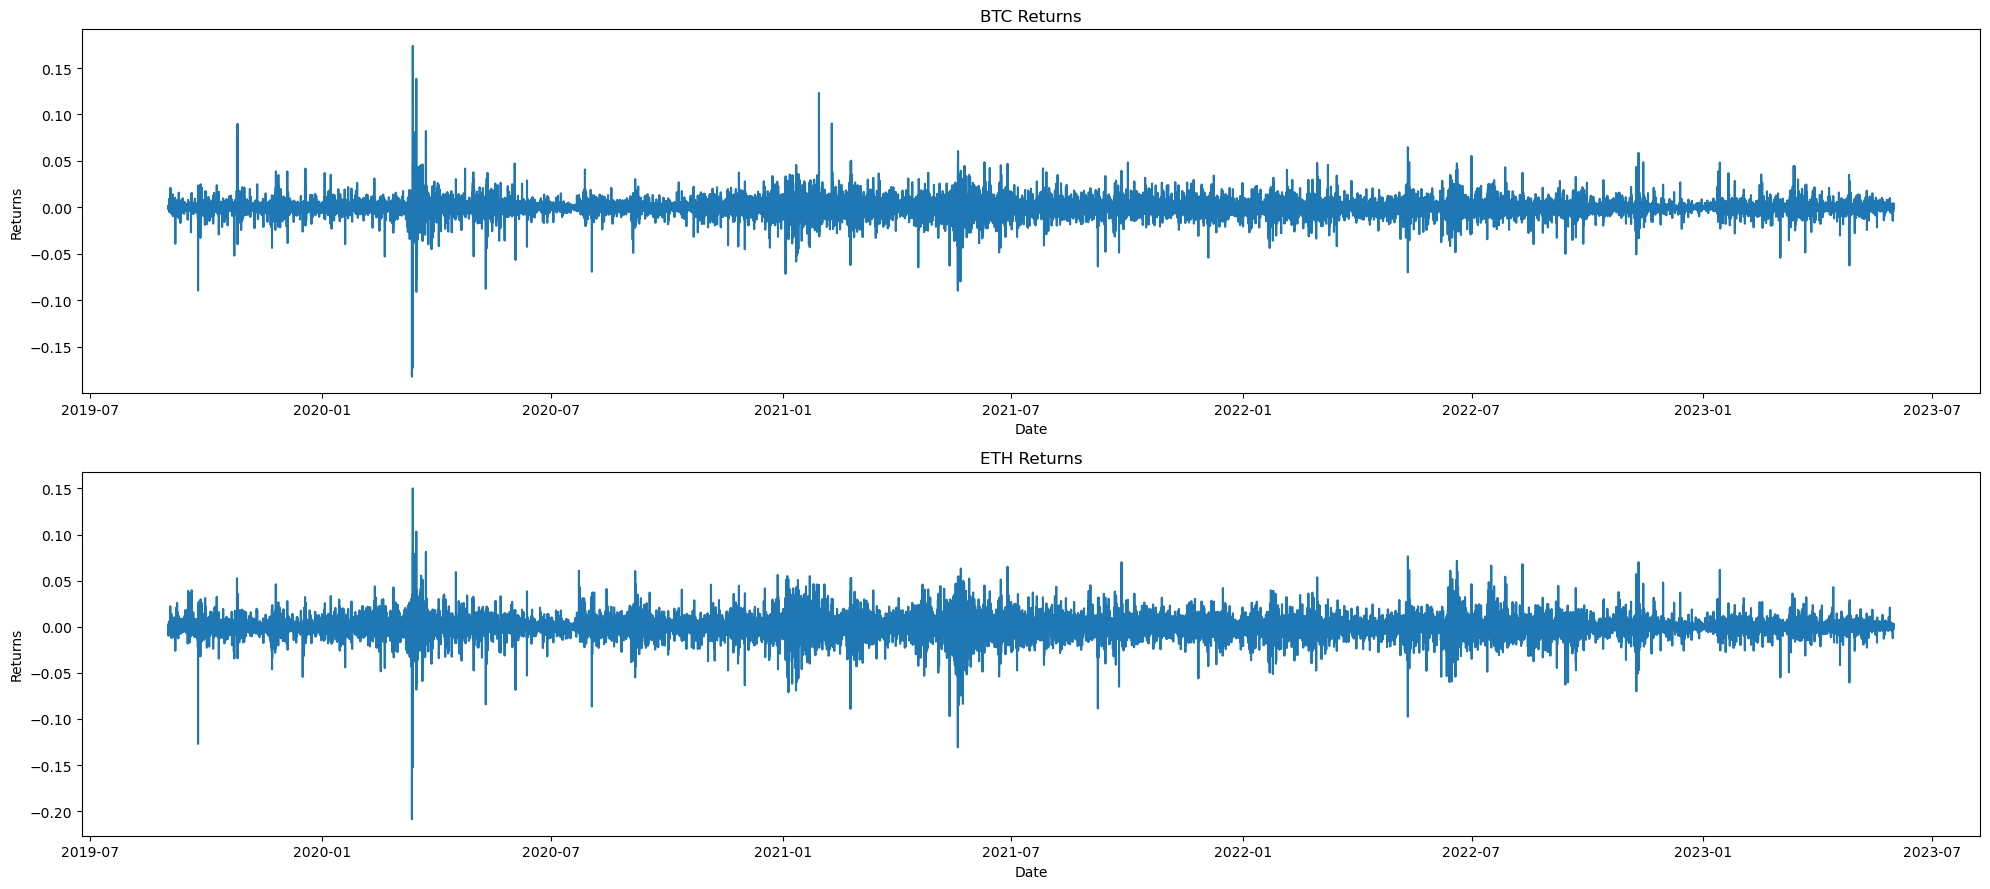

In [33]:
# ploting the closing price
plt.figure(figsize=(20, 9))

# Plotting Bitcoin price
plt.subplot(2, 1, 1)
plt.plot(returns_BTC["date"], returns_BTC["return"])
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title("BTC Returns")

# Plotting Ethereum price
plt.subplot(2, 1, 2)
plt.plot(returns_ETH["date"], returns_ETH["return"])
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title("ETH Returns")

plt.tight_layout()
plt.show()

We can see that overall **Bitcoin** is least volatile than **Ethereum**.\
For both the cryptocurrencies, we can see a huge crash around March of 2020 and also another crash in November 2022 after the crypto exchange **FTX** collapsed.

### Volatilty

In [34]:
# Bitcoin volatility
returns_BTC["return"].std()

0.0076423363302838415

In [35]:
# Ethereum volatility
returns_ETH["return"].std()

0.009590675124363216

The standard deviation confirme that **Bitcoin** is least volatile than **Ethereum**.

### Distribution Visualization of Returns

This displays the frequency and distribution of every return.

- Positive return: won money  

- Negative return: lost money

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


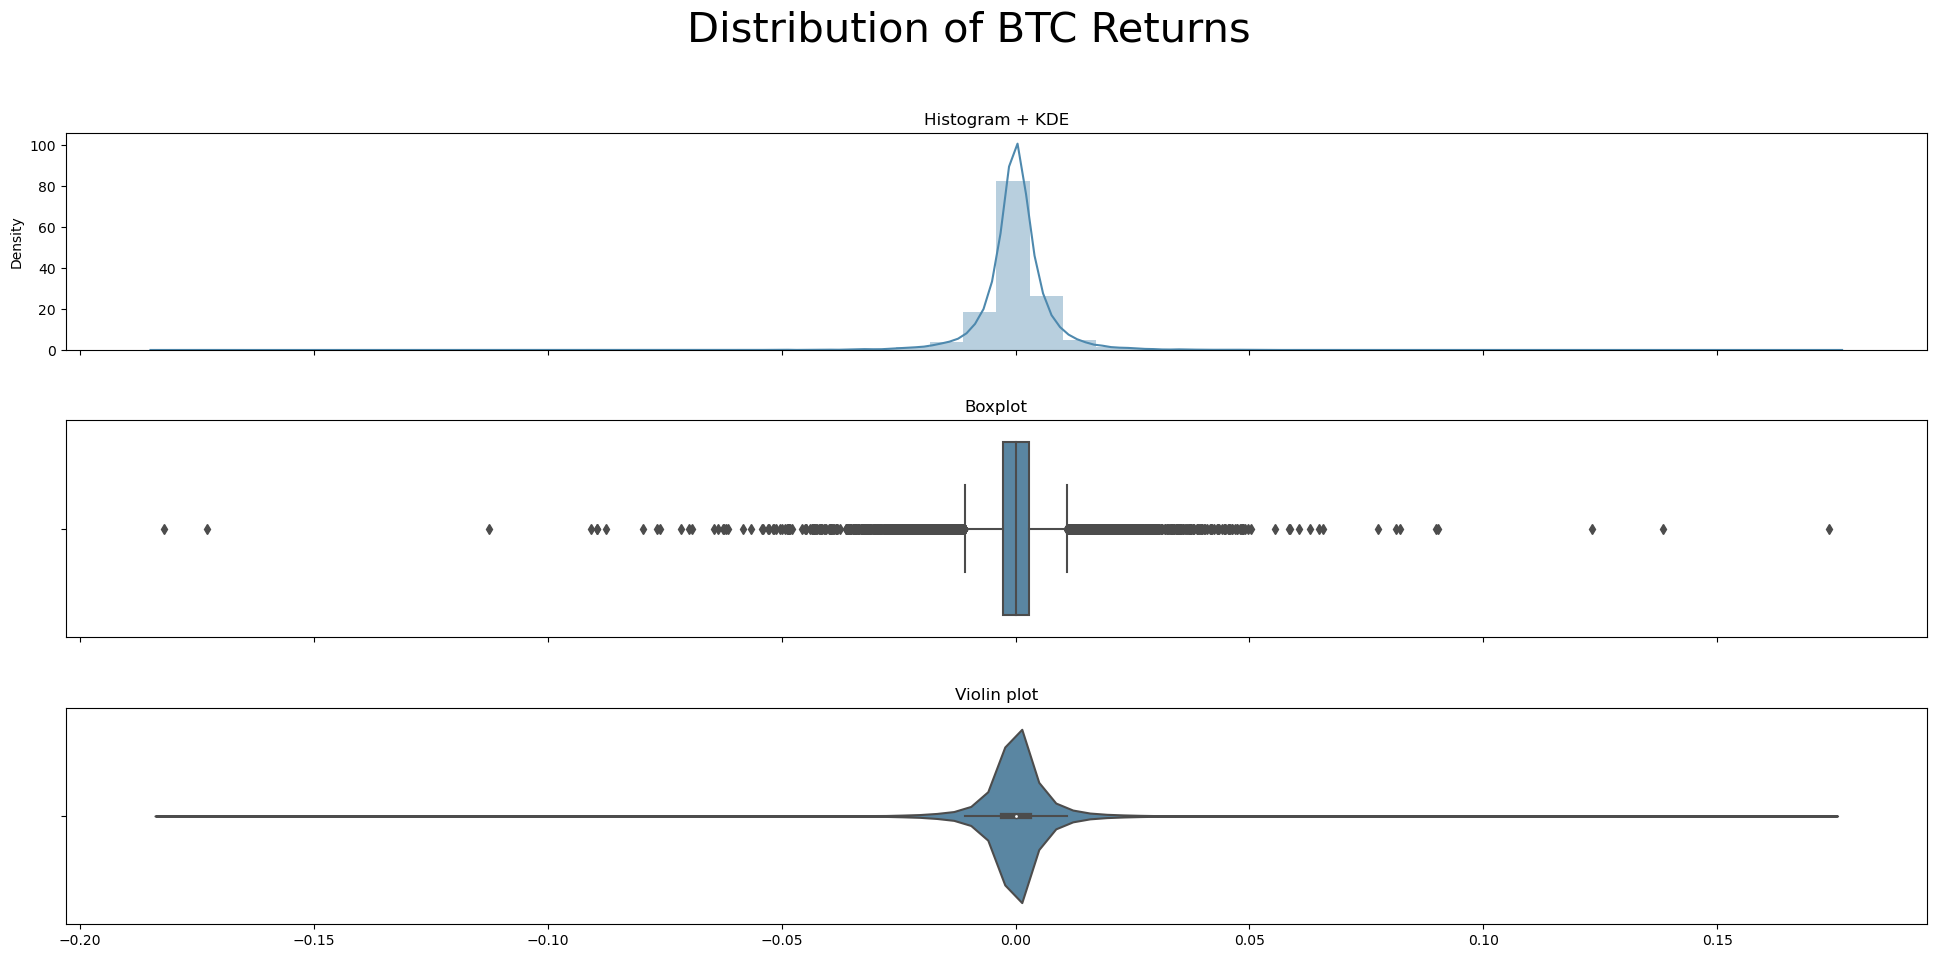

In [36]:
triple_plot(returns_BTC["return"], 'Distribution of BTC Returns', custom_colors[0])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


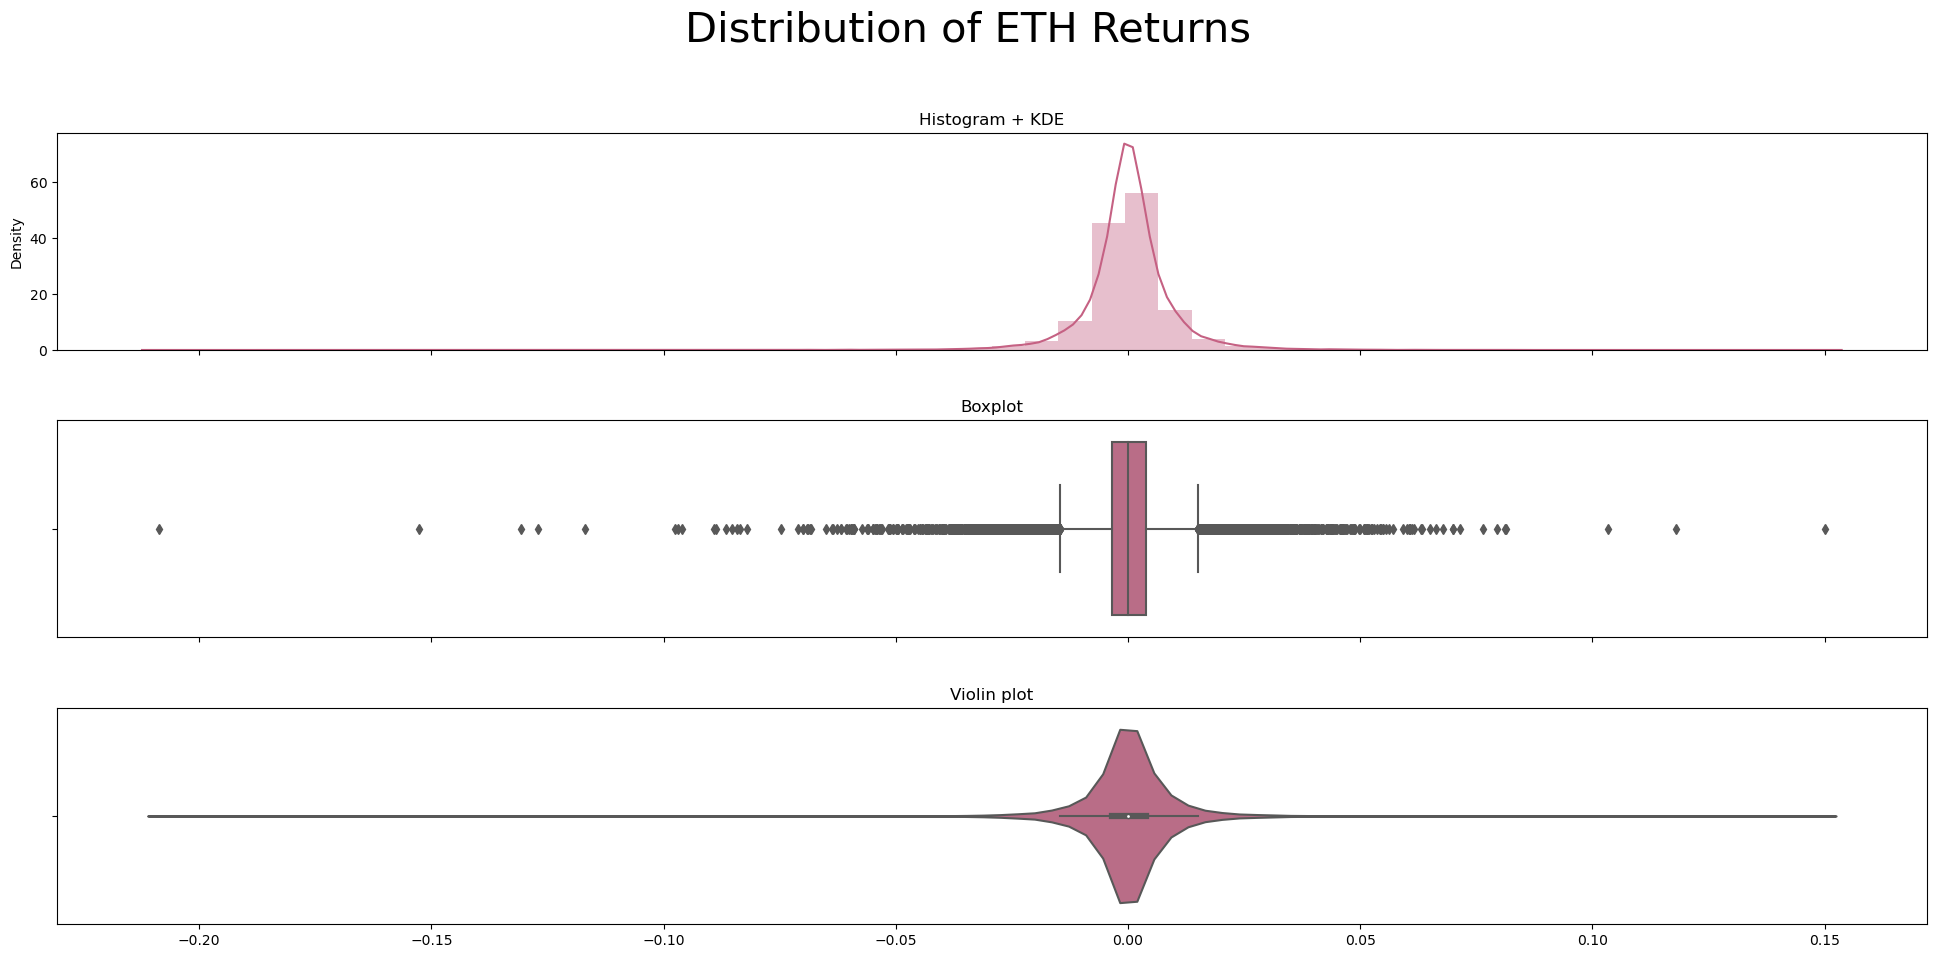

In [37]:
triple_plot(returns_ETH["return"], 'Distribution of ETH Returns', custom_colors[1])

Text(0.5, 1.0, 'Distribution of ETH Returns')

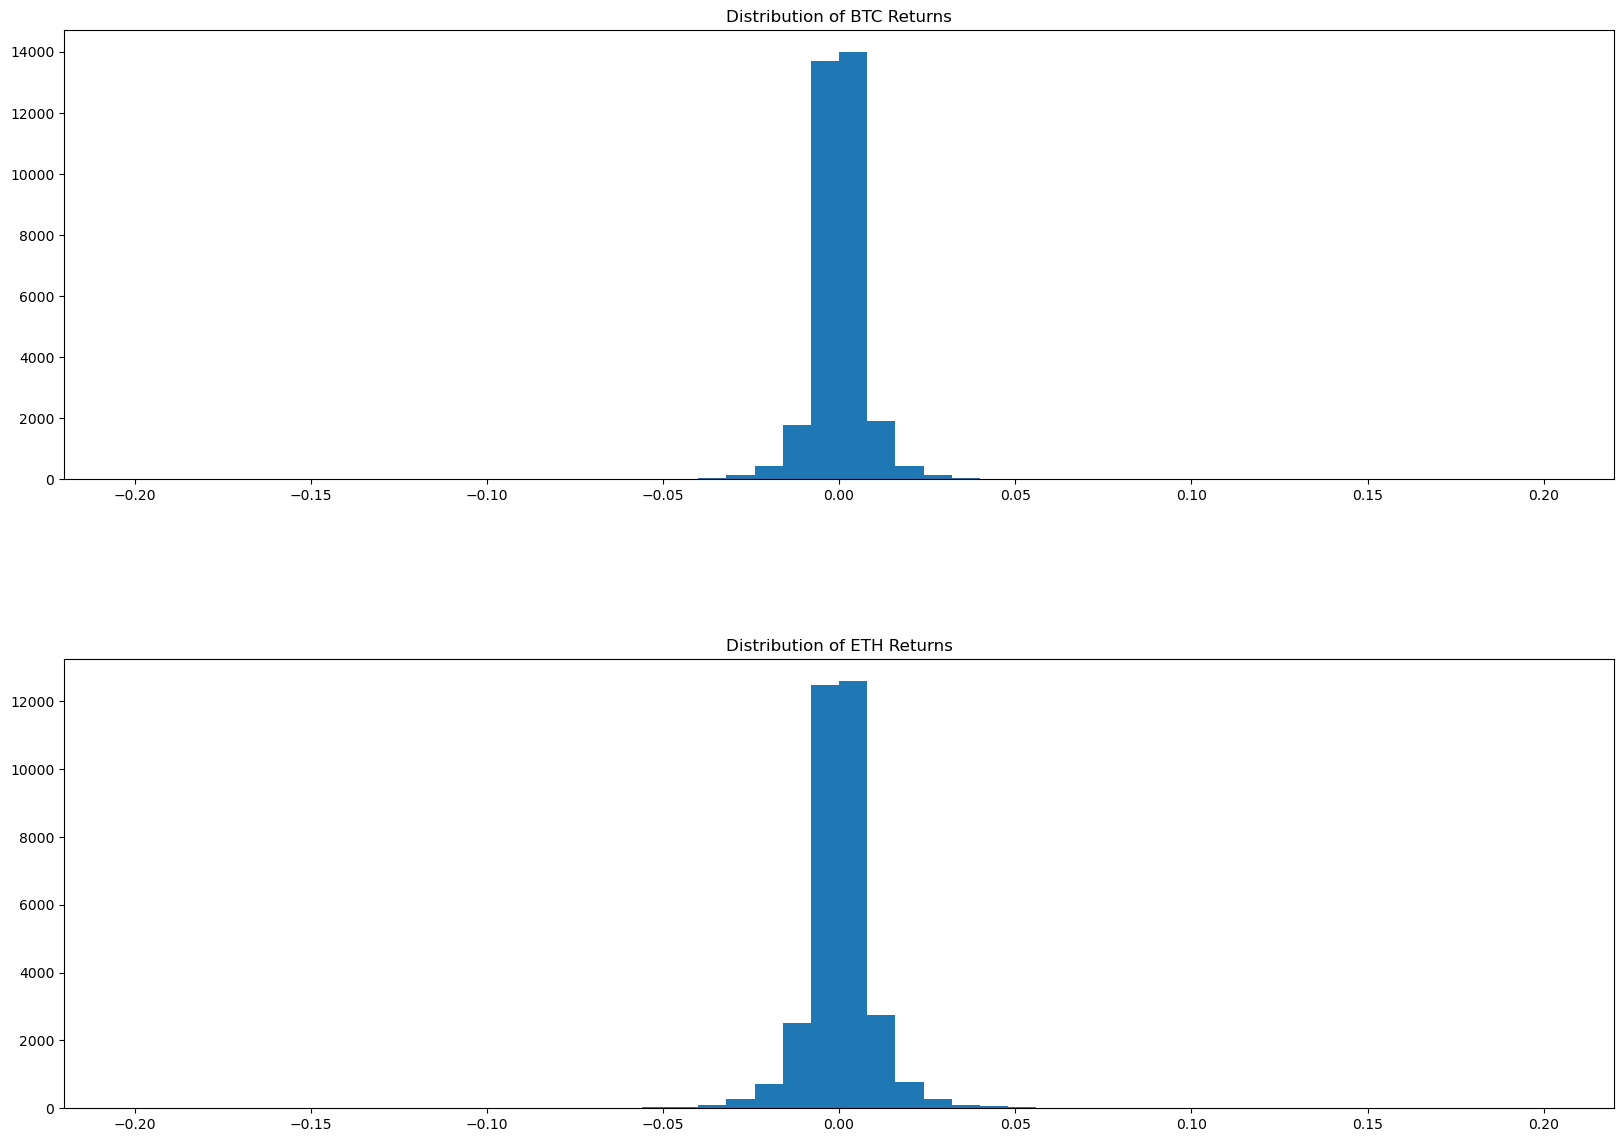

In [38]:
#ploting the histogram in subplots
fig, axs = plt.subplots(2,figsize=(20,14),gridspec_kw ={'hspace': 0.4, 'wspace': 0.1})

axs[0].hist(returns_BTC["return"], bins=50, range=(-0.2, 0.2))
axs[0].set_title('Distribution of BTC Returns')

axs[1].hist(returns_ETH["return"], bins=50, range=(-0.2, 0.2))
axs[1].set_title('Distribution of ETH Returns')

### Cumulative Returns

Cumulative return express the total change in the price of an asset over time.

We use the pandas **`cumprod()`** function to calculate the daily cumulative simple returns.

In [39]:
returns_BTC["cum_return"] = ((1 + returns_BTC["return"]).cumprod() - 1) *100
returns_BTC.head()

C:\Users\victor.komou\AppData\Local\Temp\ipykernel_22812\1925281581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_BTC["cum_return"] = ((1 + returns_BTC["return"]).cumprod() - 1) *100


,date,close,return,cum_return
0,2019-09-01 00:00:00,9617.06,NaN,NaN
1,2019-09-01 01:00:00,9614.99,-0.000215,-0.021524
2,2019-09-01 02:00:00,9605.78,-0.000958,-0.117292
3,2019-09-01 03:00:00,9623.02,0.001795,0.061973
4,2019-09-01 04:00:00,9614.46,-0.000890,-0.027035


In [40]:
returns_ETH["cum_return"] = ((1 + returns_ETH["return"]).cumprod() - 1) *100
returns_ETH.head()

C:\Users\victor.komou\AppData\Local\Temp\ipykernel_22812\1913872808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_ETH["cum_return"] = ((1 + returns_ETH["return"]).cumprod() - 1) *100


,date,close,return,cum_return
0,2019-09-01 00:00:00,172.45,NaN,NaN
1,2019-09-01 01:00:00,172.71,0.001508,0.150768
2,2019-09-01 02:00:00,172.43,-0.001621,-0.011598
3,2019-09-01 03:00:00,172.57,0.000812,0.069585
4,2019-09-01 04:00:00,172.46,-0.000637,0.005799


In [41]:
d = {'date': returns_BTC["date"], 'BTC': returns_BTC["cum_return"], 'ETH': returns_ETH["cum_return"]}
cum_returns = pd.DataFrame(data=d)
cum_returns = cum_returns.set_index('date')
cum_returns.head()

,BTC,ETH
date,,
2019-09-01 00:00:00,NaN,NaN
2019-09-01 01:00:00,-0.021524,0.150768
2019-09-01 02:00:00,-0.117292,-0.011598
2019-09-01 03:00:00,0.061973,0.069585
2019-09-01 04:00:00,-0.027035,0.005799


Text(0.5, 1.0, 'Cumulative Returns')

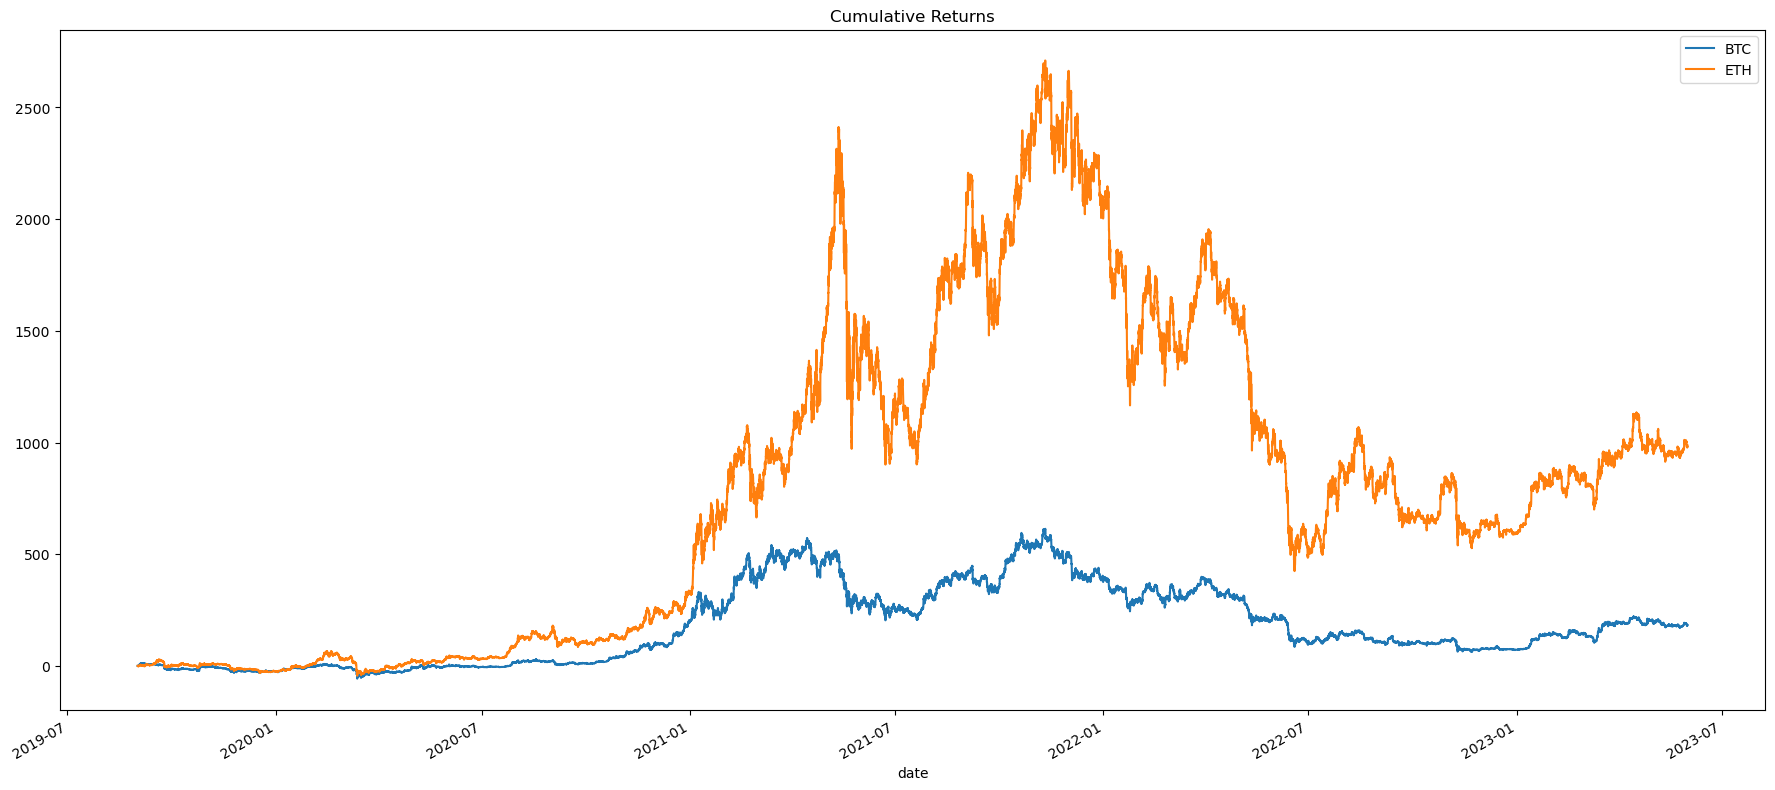

In [42]:
# Plotting the cumulative retuns for each crypto currency
cum_returns.plot(figsize=(22,10))
plt.title('Cumulative Returns')

### Correlation

Correlation is the degree in which asset prices move together (positive correlation) or against each other (negative correlation). The exact measurement is referred to as the correlation coefficient and always falls between a negative and positive spectrum of -1.0 to +1.0. Coefficients close to zero indicate no correlation.

**Correalation between features**

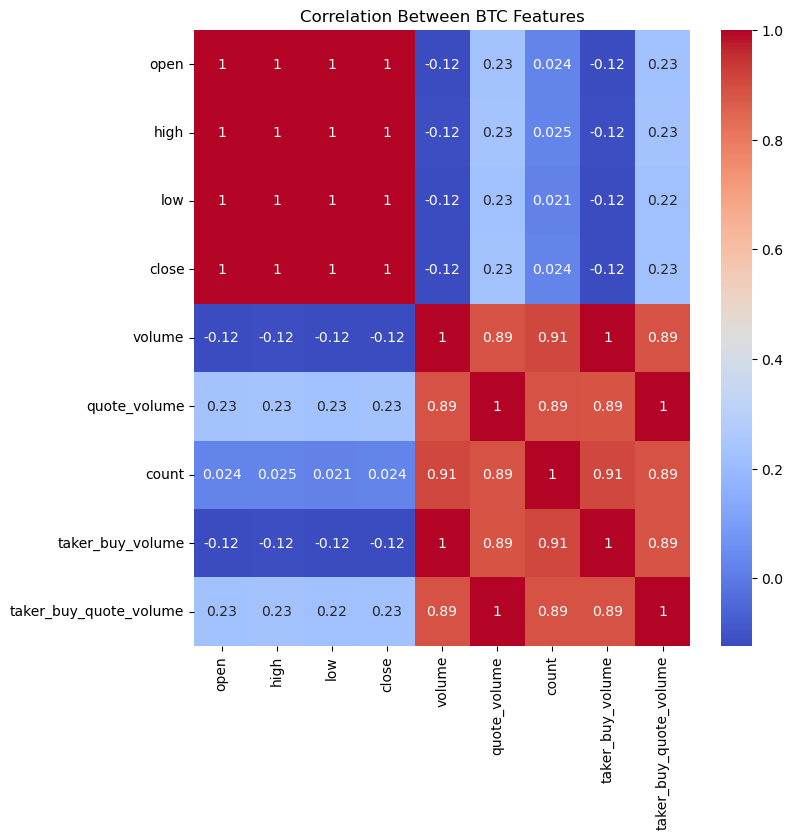

In [43]:
# Create a heatmap of the correlation between BTC features
corr = data_BTC.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between BTC Features')
plt.show()

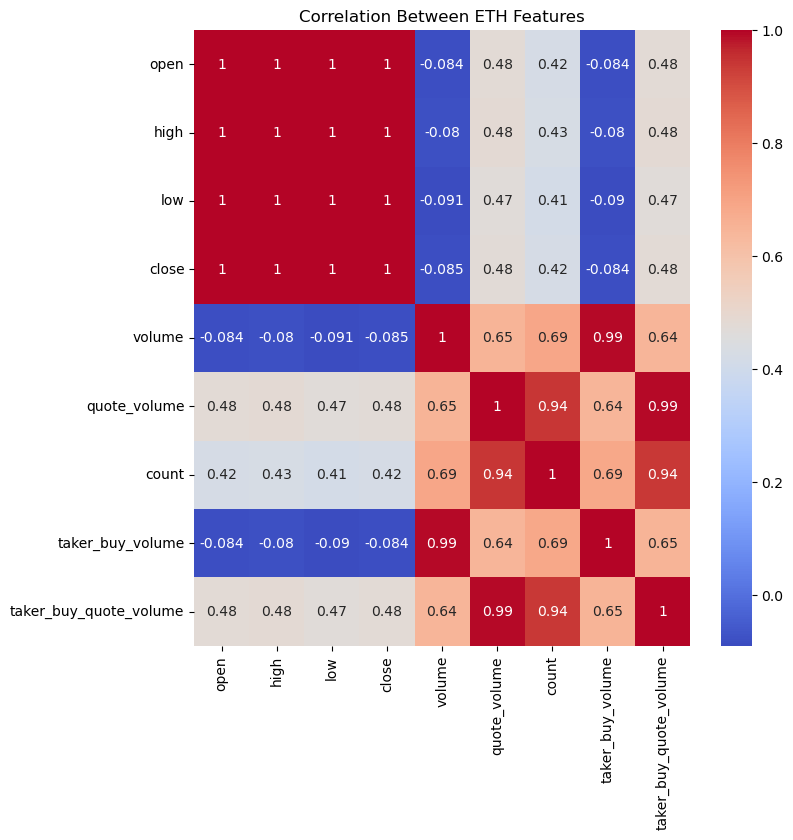

In [60]:
# Create a heatmap of the correlation between ETH features
corr = data_ETH.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between ETH Features')
plt.show()

We can see that for both cryptocurrencies, price-related features are highly correlated with each other and volume-related features are highly correlated with each other. Features related to price and features related to volume are not highly correlated with each other.

**Correalation between cryptocurrencies**

We’ll show the correlation on returns since correlation on raw price data can give biased results. 

In [45]:
d = {'date': returns_BTC["date"], 'BTC': returns_BTC["return"], 'ETH': returns_ETH["return"]}
returns = pd.DataFrame(data=d)
returns = returns.set_index('date')
returns.head()

,BTC,ETH
date,,
2019-09-01 00:00:00,NaN,NaN
2019-09-01 01:00:00,-0.000215,0.001508
2019-09-01 02:00:00,-0.000958,-0.001621
2019-09-01 03:00:00,0.001795,0.000812
2019-09-01 04:00:00,-0.000890,-0.000637


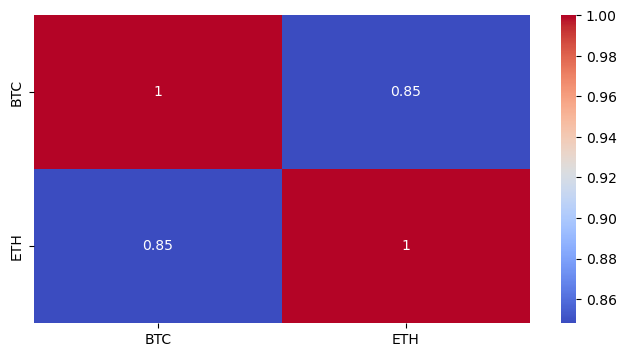

In [46]:
#plot the correlations
plt.figure(figsize=(8,4))

sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

We can see that **Bitcoin** and **Ethereum** are highly positively correlated, meaning that when **Bitcoin** goes up, **Ethereum** goes up, and when **Bitcoin** goes down, **Ethereum** goes down.

## Moving Average

Moving average (rolling average) is used to smooth out "noise", which are random short-term fluctuations in price, to identify long-term trends or cycles. For example, a 24h moving average reflects short-term trends in the stock market, whereas a 7-day rolling average indicates major trends in the stock market. 

Here we calculate the **arithmetic mean** of a given set of prices over a specified period.

In [49]:
BTC_Close = data_BTC[['date', 'close']]
BTC_Close = BTC_Close.set_index('date')

In [50]:
ETH_Close = data_ETH[['date', 'close']]
ETH_Close = ETH_Close.set_index('date')

In [54]:
# compute a BTC short-term 24h moving average
BTC_MA24 = BTC_Close['close'].rolling(24).mean()

# compute a BTC Long-term 7-day moving average
BTC_MA168 = BTC_Close['close'].rolling(168).mean()

# compute a BTC Long-term 100-day moving average
BTC_MA720 = BTC_Close['close'].rolling(720).mean()

In [55]:
# compute a ETH short-term 24h moving average
ETH_MA24 = ETH_Close['close'].rolling(24).mean()

# compute a ETH Long-term 7-day moving average
ETH_MA168 = ETH_Close['close'].rolling(168).mean()

# compute a ETH Long-term 100-day moving average
ETH_MA720 = ETH_Close['close'].rolling(720).mean()

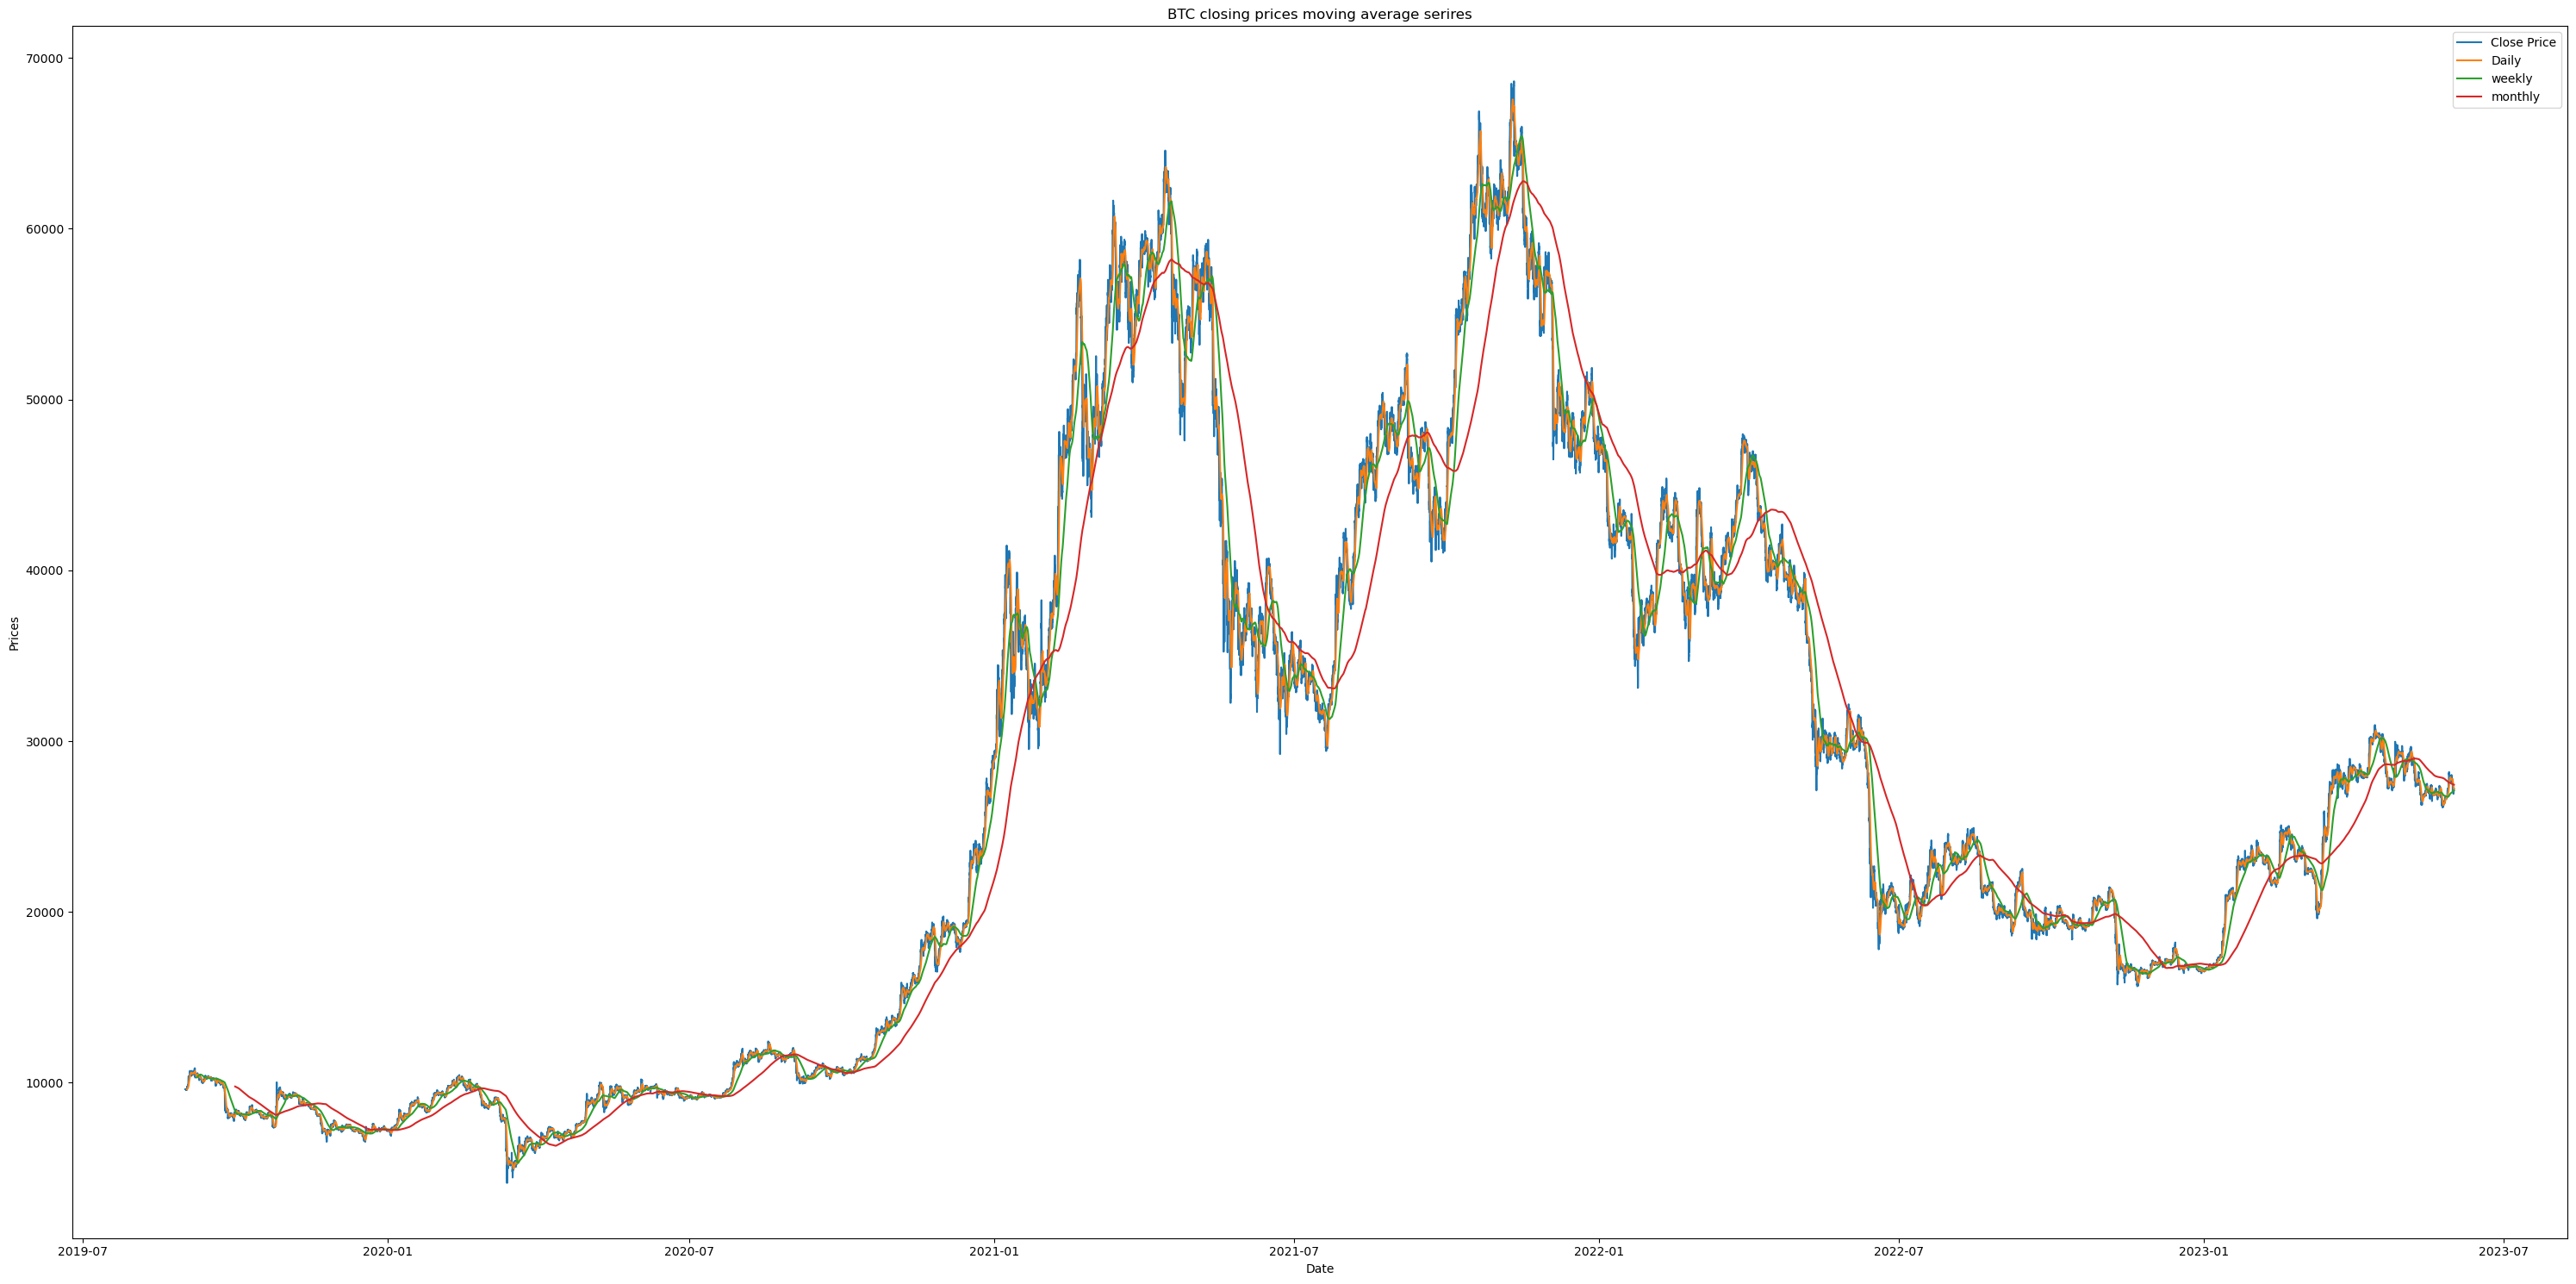

In [63]:
# ploting BTC and ETH closing prices moving average serires
plt.figure(figsize=(30, 15))

# Plotting BTC moving average series
plt.plot(BTC_Close["close"], label="Close Price")
plt.plot(BTC_MA24, label="Daily")
plt.plot(BTC_MA168, label="weekly")
plt.plot(BTC_MA720, label="monthly")
plt.title("BTC closing prices moving average serires")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()

plt.tight_layout()
plt.show()

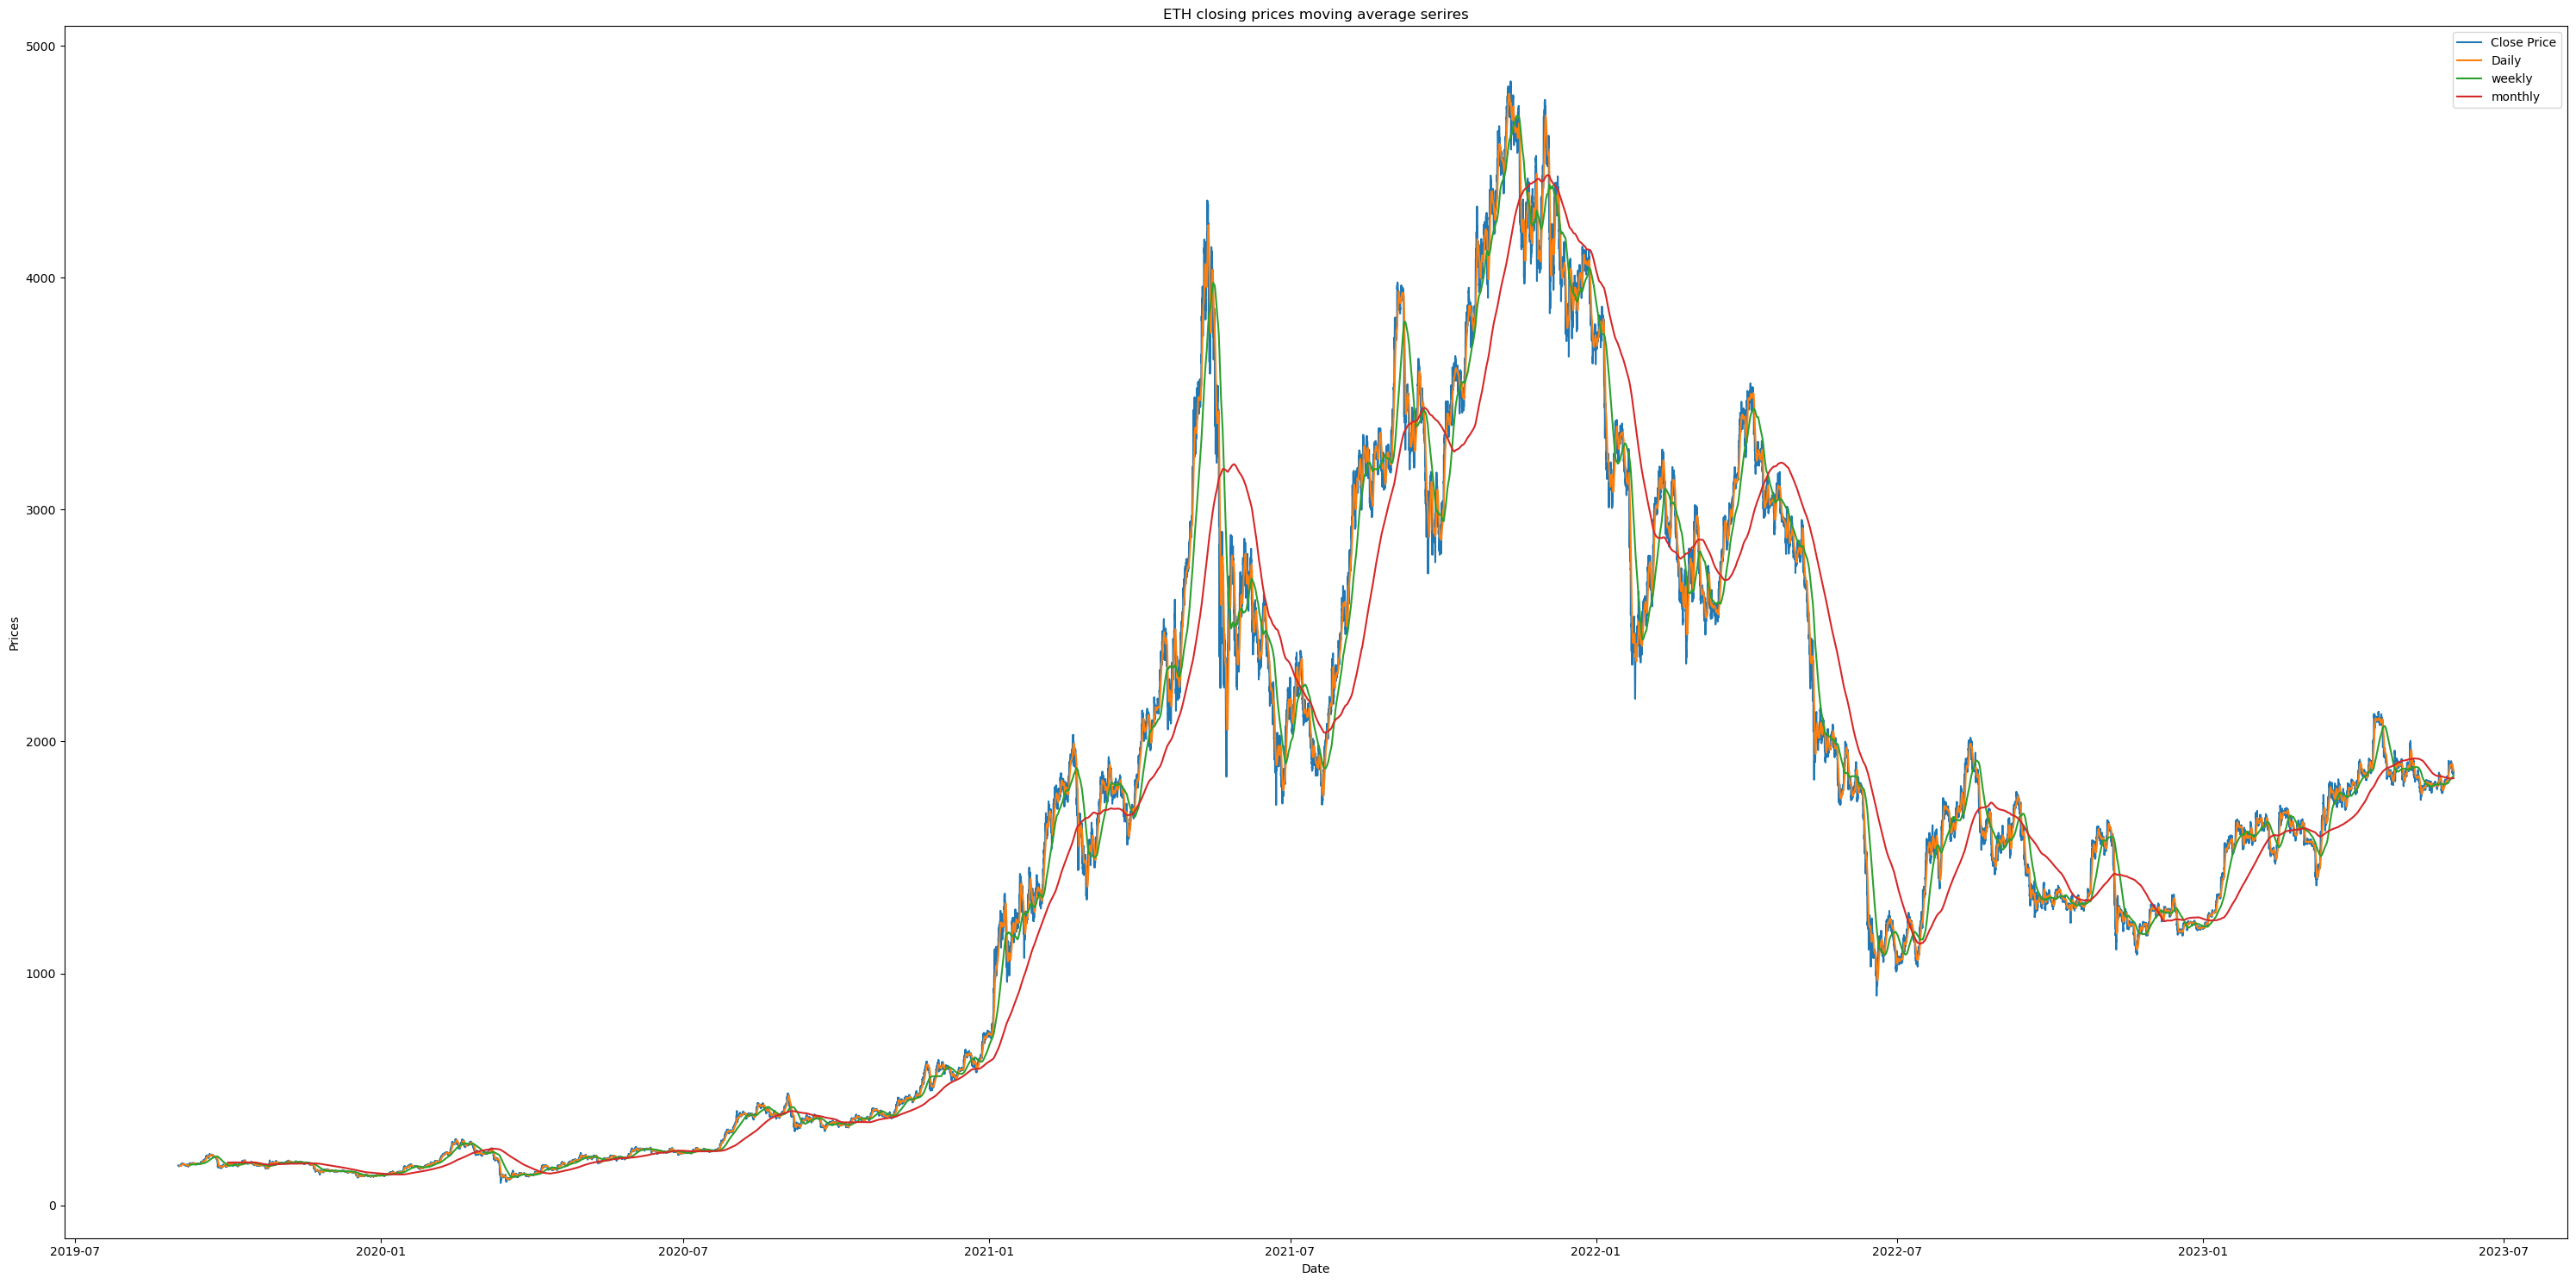

In [65]:
# ploting BTC and ETH closing prices moving average serires
plt.figure(figsize=(30, 15))

# Plotting ETH moving average series
plt.plot(ETH_Close["close"], label="Close Price")
plt.plot(ETH_MA24, label="Daily")
plt.plot(ETH_MA168, label="weekly")
plt.plot(ETH_MA720, label="monthly")
plt.title("ETH closing prices moving average serires")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()

plt.tight_layout()
plt.show()